# Εργασία 4

In [ ]:
# Upgrade to sklearn v 1.3.2
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import math
import random
import os

import torch
from torch import nn
from torchsummary import summary
from sklearn.metrics import precision_recall_curve, auc

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

from matplotlib.colors import ListedColormap

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
# See if torchmetrics exists, if not, install it
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

from tqdm.auto import tqdm
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
from typing import List

mlxtend version: 0.23.0
0.23.0


In [ ]:
RANDOM_SEED = 26
# RANDOM_SEED = 1234 # To check the models for a different random split in exersise 1

# Άσκηση 1

Πρέπει να κάνουμε upload το αρχείο iris.zip στο colab.

In [ ]:
!ls

breast+cancer+wisconsin+diagnostic.zip	iris  iris.zip	sample_data


In [ ]:
if not os.path.exists('iris'): # If it is not already unzipped
  !unzip iris.zip

In [ ]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'] # Taken from iris.names

# Read the data into a dataframe, file is separated with ,
iris_df = pd.read_csv("iris/iris.data", sep=",", header=None, names=column_names)

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Count samples of each class
unique_classes, counts = np.unique(iris_df["class"], return_counts=True)

# Display the results
for cl, count in zip(unique_classes, counts):
  print(f'Class {cl}: {count} samples')

Class Iris-setosa: 50 samples
Class Iris-versicolor: 50 samples
Class Iris-virginica: 50 samples


In [ ]:
num_samples = iris_df.shape[0]
num_features = iris_df.shape[1]-1
num_classes = len(unique_classes)
print("Number of samples is", num_samples, "and number of features is", num_features, "and number of classes is", num_classes)

Number of samples is 150 and number of features is 4 and number of classes is 3


In [ ]:
# Create a mapping dictionary in order to convert class names to numerical values
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# Apply the mapping to the 'class' column
iris_df['class_encoded'] = iris_df['class'].map(class_mapping)

In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,class,class_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [ ]:
# Extract features and convert it to a NumPy array
x_data = iris_df.iloc[:, :num_features].values
# Extract the last column (labels) and convert it to a NumPy array
y_data = iris_df.iloc[:, -1].values # Labels must have numerical values

In [ ]:
print(x_data.shape)
print(y_data.shape)

(150, 4)
(150,)


## 1.A

In [ ]:
# Split 80% Training - 20% Testing
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=RANDOM_SEED)

# Print the sizes
print("Size of X_train:", len(X_train))
print("Size of X_test:", len(X_test))
print("Size of y_train:", len(y_train))
print("Size of y_test:", len(y_test))

Size of X_train: 120
Size of X_test: 30
Size of y_train: 120
Size of y_test: 30


## 1.B

### Turn data to Tensors

In [ ]:
# Before training we need to turn data into tensors
# This error happens when i define the loss function if i put Int instead of Long at labels -> expected scalar type Long but found Int
X_train_original = torch.FloatTensor(X_train)
X_test_original = torch.FloatTensor(X_test)
y_train_original = torch.LongTensor(y_train)
y_test_original = torch.LongTensor(y_test)

In [ ]:
# View the first five samples
X_train_original[:5], y_train_original[:5]

(tensor([[6.3000, 2.3000, 4.4000, 1.3000],
         [5.8000, 2.6000, 4.0000, 1.2000],
         [6.3000, 2.5000, 4.9000, 1.5000],
         [6.9000, 3.1000, 5.4000, 2.1000],
         [4.7000, 3.2000, 1.6000, 0.2000]]),
 tensor([1, 1, 1, 2, 0]))

In [ ]:
# Check the shapes of our features and labels
X_train_original.shape, y_train_original.shape

(torch.Size([120, 4]), torch.Size([120]))

In [ ]:
# Print sizes of splited data
print(f"Training samples: {len(X_train_original)}, Testing samples: {len(X_test_original)}")
print(f"Training labels: {len(y_train_original)}, Testing labels: {len(y_test_original)}")

Training samples: 120, Testing samples: 30
Training labels: 120, Testing labels: 30


### Device Agnostic Code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu" # If GPU is available, it will be used
device

'cuda'

### Hyperparameters to tune

In [ ]:
# Hyperparameters to tune, for comparing models these must not be changed
EPOCHS = 50
LEARNING_RATE = 0.01

### Create Model 0

In [ ]:
class IrisModelV0(nn.Module): # [Input (number of features)] -> Hidden layer 1 (hidden_units) - sigmoid activation -> Output layer (number of classes)
  def __init__(self, input_shape: int, output_shape: int, hidden_units: int): # Define model architecture
    super().__init__()
    self.input_layer = nn.Linear(in_features=input_shape, out_features=hidden_units)
    self.output_layer = nn.Linear(in_features=hidden_units, out_features=output_shape)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x: torch.Tensor): # Define the forward method
    x = self.input_layer(x)
    x = self.sigmoid(x)
    return self.output_layer(x)

# For reproducability
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

model_0 = IrisModelV0(input_shape = num_features, output_shape = num_classes, hidden_units = 30).to(device) # Send model to device (very important if a GPU is used)
model_0

IrisModelV0(
  (input_layer): Linear(in_features=4, out_features=30, bias=True)
  (output_layer): Linear(in_features=30, out_features=3, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
# Print the model summary
summary(model_0, (num_features,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]             150
           Sigmoid-2                   [-1, 30]               0
            Linear-3                    [-1, 3]              93
Total params: 243
Trainable params: 243
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


### Train the model

In [ ]:
# Function that calculates and returns the model's accuracy
def accuracy_fn(y_true: torch.tensor, y_pred: torch.tensor):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss() # For multiclass classification
optimizer = torch.optim.Adam(model_0.parameters(), lr=LEARNING_RATE) # Use Adams optimizer

In [ ]:
# Function that performs a training step during one epoch
def train_step(model: torch.nn.Module,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               X_train: torch.tensor,
               y_train: torch.tensor):

  model.train() # Set training mode

  # 1. Forward pass
  y_logits = model(X_train) # Model outputs raw logits, logits are the model's output before softmax activation function
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # Go from logits -> prediction probabilities -> prediction labels, dim=1 means columns

  # 2. Calculate loss (and accuracy)
  train_loss = loss_fn(y_logits, y_train)
  train_acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  train_loss.backward()

  # 5. Optimizer step
  optimizer.step()

  return train_loss, train_acc

In [ ]:
# Function that performs a testing step during one epoch
def test_step(model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              X_test: torch.tensor,
              y_test: torch.tensor):

  model.eval() # Set evaluation mode
  with torch.inference_mode(): # Analogous to no_grad to be used when you are certain your operations will have no interactions with autograd (e.g., model training) -> Pytorch Documentation
    # 1. Forward pass
    test_logits = model(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # 2. Calculate test loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  return test_loss, test_acc

In [ ]:
# Train the model
train_loss_values = []
test_loss_values = []
train_acc_values = []
test_acc_values = []
epoch_count = []

# Send data to device (very important if a GPU is used)
# Data and model must be at the same device
X_train = X_train_original.to(device)
X_test = X_test_original.to(device)
y_train = y_train_original.to(device)
y_test = y_test_original.to(device)

for epoch in tqdm(range(1, EPOCHS+1)):
  # Training step
  train_loss, train_acc = train_step(model=model_0, loss_fn=loss_fn, optimizer=optimizer, X_train=X_train, y_train=y_train)
  # Testing step
  test_loss, test_acc = test_step(model=model_0, loss_fn=loss_fn, X_test=X_test, y_test=y_test)

  if epoch % 5 == 0: # Print every 5 epochs
    print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

  # Keep in lists for plots
  epoch_count.append(epoch)
  # Matplotlib needs data at CPU, if they are on GPU we need to get them back to CPU
  # This happens because Matplotlib works with Numpy that works on CPU
  train_loss_values.append(train_loss.detach().cpu().numpy())
  test_loss_values.append(test_loss.detach().cpu().numpy())
  train_acc_values.append(train_acc)
  test_acc_values.append(test_acc)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 5 | Loss: 1.04733, Acc: 33.33% | Test Loss: 1.04130, Test Acc: 33.33%
Epoch: 10 | Loss: 0.94373, Acc: 73.33% | Test Loss: 0.93055, Test Acc: 80.00%
Epoch: 15 | Loss: 0.83783, Acc: 81.67% | Test Loss: 0.81146, Test Acc: 93.33%
Epoch: 20 | Loss: 0.72318, Acc: 95.00% | Test Loss: 0.70593, Test Acc: 93.33%
Epoch: 25 | Loss: 0.62047, Acc: 92.50% | Test Loss: 0.60489, Test Acc: 96.67%
Epoch: 30 | Loss: 0.53960, Acc: 95.83% | Test Loss: 0.52562, Test Acc: 96.67%
Epoch: 35 | Loss: 0.48109, Acc: 95.83% | Test Loss: 0.47146, Test Acc: 96.67%
Epoch: 40 | Loss: 0.43618, Acc: 95.83% | Test Loss: 0.42295, Test Acc: 96.67%
Epoch: 45 | Loss: 0.39579, Acc: 96.67% | Test Loss: 0.37899, Test Acc: 100.00%
Epoch: 50 | Loss: 0.35758, Acc: 96.67% | Test Loss: 0.33662, Test Acc: 100.00%


In [ ]:
# Calculate model 0 results on test dataset, keep a dictionary for comparing the models at the end
model_0_results = {"model_name": model_0.__class__.__name__,
                   "train_loss": train_loss.item(),
                   "train_acc": train_acc,
                   "test_loss": test_loss.item(),
                   "test_acc": test_acc}
model_0_results

{'model_name': 'IrisModelV0',
 'train_loss': 0.35757845640182495,
 'train_acc': 96.66666666666667,
 'test_loss': 0.3366186022758484,
 'test_acc': 100.0}

## 1.Γ

### Plot Loss and Accuracy curves

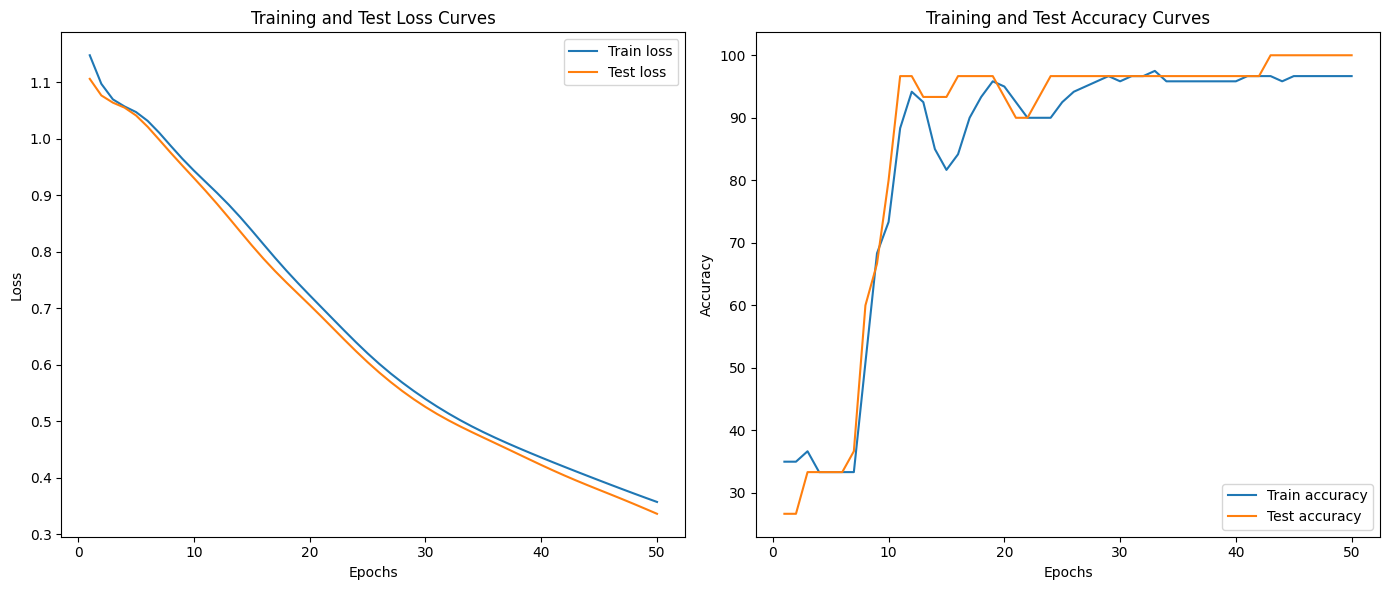

In [ ]:
# Create subplots with two columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the loss curves
axs[0].plot(epoch_count, train_loss_values, label="Train loss")
axs[0].plot(epoch_count, test_loss_values, label="Test loss")
axs[0].set_title("Training and Test Loss Curves")
axs[0].set_ylabel("Loss")
axs[0].set_xlabel("Epochs")
axs[0].legend()

# Plot the accuracy curves
axs[1].plot(epoch_count, train_acc_values, label="Train accuracy")
axs[1].plot(epoch_count, test_acc_values, label="Test accuracy")
axs[1].set_title("Training and Test Accuracy Curves")
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

### Make predictions

In [ ]:
# Function that returns the predictions of a modeld on the test set and prints test accuracy
def make_predictions(model: torch.nn.Module, X_test: torch.tensor, y_test: torch.tensor):
  model.eval() # Set evaluation mode

  with torch.inference_mode():
    y_logits = model(X_test)
    # Turn predicted logits in prediction probabilities
    y_pred_probs = torch.softmax(y_logits, dim=1)
    # Turn prediction probabilities into prediction labels
    y_preds = y_pred_probs.argmax(dim=1)

  # Print test accuracy
  print(f"Test accuracy: {accuracy_fn(y_true=y_test, y_pred=y_preds):.2f}%")

  return y_preds

In [ ]:
# Get final test accuracy
y_preds = make_predictions(model_0, X_test, y_test)

Test accuracy: 100.00%


### Confusion Matrix

In [ ]:
# Function that plots confusion matrix based on a models predictions
def plot_confusion_mat(y_preds: torch.tensor, y_test: torch.tensor, class_names: List[str]): # List[str] means numpy array type
  # Matplotlib works with Numpy that works on CPU
  y_preds = y_preds.cpu()
  y_test = y_test.cpu()

  # Setup confusion matrix instance and compare predictions to targets
  confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
  confmat_tensor = confmat(preds=y_preds, target=y_test)

  # Plot the confusion matrix
  fig, ax = plot_confusion_matrix(
  conf_mat=confmat_tensor.cpu().numpy(), # Matplotlib works with Numpy that works on CPU
  class_names=class_names, # Turn the row and column labels into class names
  figsize=(10, 7));

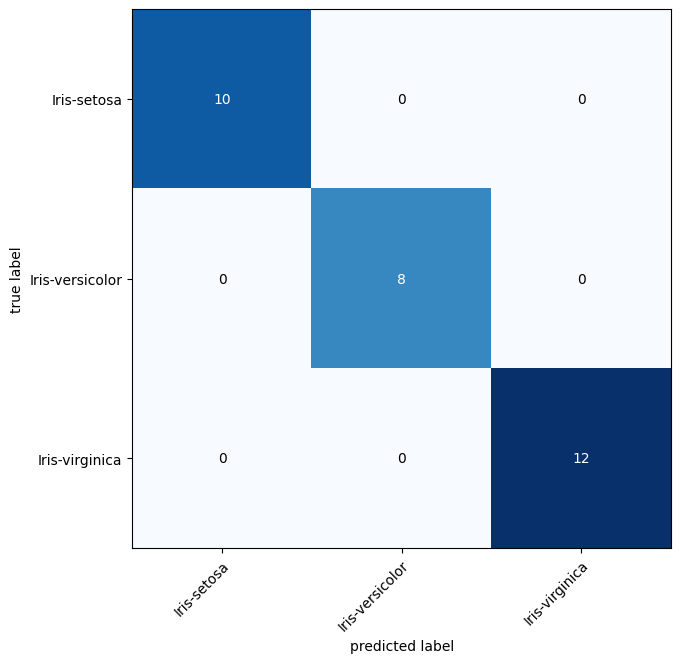

In [ ]:
# Plot confusion matrix
plot_confusion_mat(y_preds, y_test, unique_classes)

## 1.Δ

### Create Model 1

In [ ]:
class IrisModelV1(nn.Module): # [Input (number of features)] -> Hidden layer 1 (hidden_units) - relu activation -> Output layer (number of classes)
  def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
    super().__init__()
    self.input_layer = nn.Linear(in_features=input_shape, out_features=hidden_units)
    self.output_layer = nn.Linear(in_features=hidden_units, out_features=output_shape)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor):
    x = self.input_layer(x)
    x = self.relu(x)
    return self.output_layer(x)

# For reproducability
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

model_1 = IrisModelV1(input_shape = 4, output_shape = 3, hidden_units = 30).to(device) # Send model to device (very important if a GPU is used)
model_1

IrisModelV1(
  (input_layer): Linear(in_features=4, out_features=30, bias=True)
  (output_layer): Linear(in_features=30, out_features=3, bias=True)
  (relu): ReLU()
)

In [ ]:
# Print the model summary
summary(model_1, (num_features,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]             150
              ReLU-2                   [-1, 30]               0
            Linear-3                    [-1, 3]              93
Total params: 243
Trainable params: 243
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


### Train the model

In [ ]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss() # For multiclass classification
optimizer = torch.optim.Adam(model_1.parameters(), lr=LEARNING_RATE) # Use Adams optimizer

In [ ]:
# Train the model
train_loss_values = []
test_loss_values = []
train_acc_values = []
test_acc_values = []
epoch_count = []

# Send data to device (very important if a GPU is used)
X_train = X_train_original.to(device)
X_test = X_test_original.to(device)
y_train = y_train_original.to(device)
y_test = y_test_original.to(device)

for epoch in tqdm(range(1, EPOCHS+1)):
  # Training
  train_loss, train_acc = train_step(model=model_1, loss_fn=loss_fn, optimizer=optimizer, X_train=X_train, y_train=y_train)
  # Testing
  test_loss, test_acc = test_step(model=model_1, loss_fn=loss_fn, X_test=X_test, y_test=y_test)

  if epoch % 5 == 0:
    print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

  epoch_count.append(epoch)
  # Matplotlib needs data at CPU, if they are on GPU we need to get them back to CPU
  # This happens because Matplotlib works with Numpy that works on CPU
  train_loss_values.append(train_loss.detach().cpu().numpy())
  test_loss_values.append(test_loss.detach().cpu().numpy())
  train_acc_values.append(train_acc)
  test_acc_values.append(test_acc)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 5 | Loss: 0.93075, Acc: 55.00% | Test Loss: 0.88260, Test Acc: 76.67%
Epoch: 10 | Loss: 0.76405, Acc: 65.00% | Test Loss: 0.72332, Test Acc: 73.33%
Epoch: 15 | Loss: 0.61493, Acc: 90.83% | Test Loss: 0.59692, Test Acc: 93.33%
Epoch: 20 | Loss: 0.51328, Acc: 93.33% | Test Loss: 0.49308, Test Acc: 100.00%
Epoch: 25 | Loss: 0.44780, Acc: 94.17% | Test Loss: 0.43037, Test Acc: 100.00%
Epoch: 30 | Loss: 0.39542, Acc: 95.83% | Test Loss: 0.37719, Test Acc: 100.00%
Epoch: 35 | Loss: 0.34673, Acc: 96.67% | Test Loss: 0.32674, Test Acc: 100.00%
Epoch: 40 | Loss: 0.30022, Acc: 96.67% | Test Loss: 0.27731, Test Acc: 100.00%
Epoch: 45 | Loss: 0.25910, Acc: 96.67% | Test Loss: 0.23281, Test Acc: 100.00%
Epoch: 50 | Loss: 0.22369, Acc: 95.83% | Test Loss: 0.19425, Test Acc: 100.00%


In [ ]:
# Calculate model 1 results on test dataset
model_1_results = {"model_name": model_1.__class__.__name__,
                   "train_loss": train_loss.item(),
                   "train_acc": train_acc,
                   "test_loss": test_loss.item(),
                   "test_acc": test_acc}
model_1_results

{'model_name': 'IrisModelV1',
 'train_loss': 0.2236947864294052,
 'train_acc': 95.83333333333334,
 'test_loss': 0.19425049424171448,
 'test_acc': 100.0}

### Plot Loss and Accuracy curves

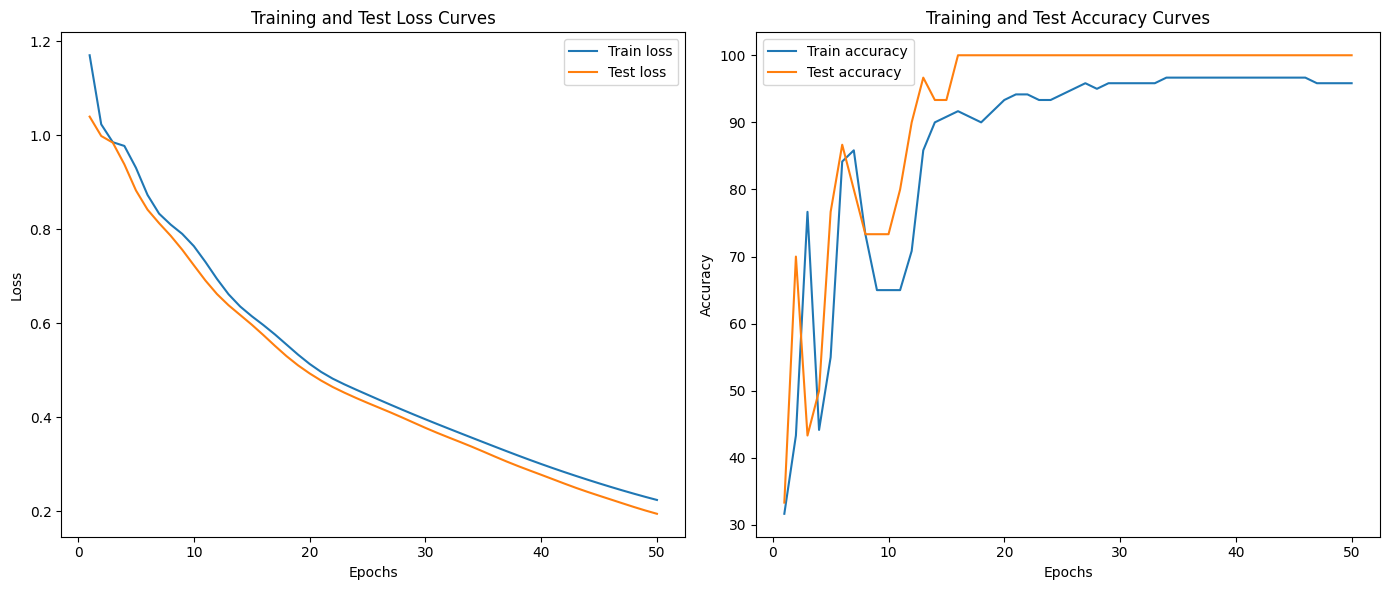

In [ ]:
# Create subplots with two columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the loss curves
axs[0].plot(epoch_count, train_loss_values, label="Train loss")
axs[0].plot(epoch_count, test_loss_values, label="Test loss")
axs[0].set_title("Training and Test Loss Curves")
axs[0].set_ylabel("Loss")
axs[0].set_xlabel("Epochs")
axs[0].legend()

# Plot the accuracy curves
axs[1].plot(epoch_count, train_acc_values, label="Train accuracy")
axs[1].plot(epoch_count, test_acc_values, label="Test accuracy")
axs[1].set_title("Training and Test Accuracy Curves")
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

### Make predictions

In [ ]:
# Get final test accuracy
y_preds = make_predictions(model_1, X_test, y_test)

Test accuracy: 100.00%


### Confusion Matrix

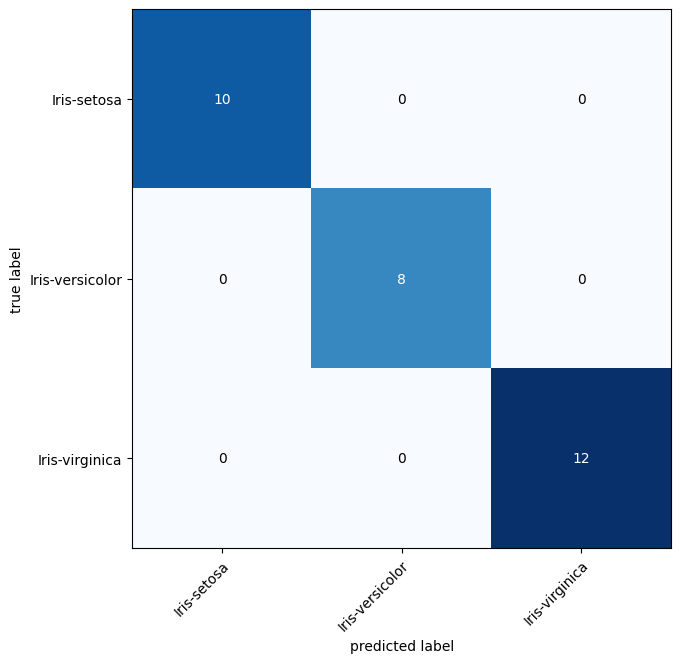

In [ ]:
# Plot confusion matrixc
plot_confusion_mat(y_preds, y_test, unique_classes)

## 1.E

### Create Model 2

In [ ]:
class IrisModelV2(nn.Module): # [Input (number of features)] -> Hidden layer 1 (hidden_units) - relu activation -> Hidden layer 2 (hidden_units) - relu activation
                              # -> Output layer (number of classes)

  def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
    super().__init__()
    self.input_layer = nn.Linear(in_features=input_shape, out_features=hidden_units)
    self.hidden_layer = nn.Linear(in_features=hidden_units, out_features=hidden_units)
    self.output_layer = nn.Linear(in_features=hidden_units, out_features=output_shape)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor):
    x = self.relu(self.input_layer(x))
    x = self.relu(self.hidden_layer(x))
    return self.output_layer(x)

# For reproducability
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

model_2 = IrisModelV2(input_shape = 4, output_shape = 3, hidden_units = 60).to(device) # Send model to device (very important if a GPU is used)
model_2

IrisModelV2(
  (input_layer): Linear(in_features=4, out_features=60, bias=True)
  (hidden_layer): Linear(in_features=60, out_features=60, bias=True)
  (output_layer): Linear(in_features=60, out_features=3, bias=True)
  (relu): ReLU()
)

In [ ]:
# Print the model summary
summary(model_2, (num_features,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 60]             300
              ReLU-2                   [-1, 60]               0
            Linear-3                   [-1, 60]           3,660
              ReLU-4                   [-1, 60]               0
            Linear-5                    [-1, 3]             183
Total params: 4,143
Trainable params: 4,143
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


### Train the model

In [ ]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss() # For multiclass classification
optimizer = torch.optim.Adam(model_2.parameters(), lr=LEARNING_RATE) # Use Adams optimizer

In [ ]:
# Train the model
train_loss_values = []
test_loss_values = []
train_acc_values = []
test_acc_values = []
epoch_count = []

# Send data to device (very important if a GPU is used)
X_train = X_train_original.to(device)
X_test = X_test_original.to(device)
y_train = y_train_original.to(device)
y_test = y_test_original.to(device)

for epoch in tqdm(range(1, EPOCHS+1)):
  # Training
  train_loss, train_acc = train_step(model=model_2, loss_fn=loss_fn, optimizer=optimizer, X_train=X_train, y_train=y_train)
  # Testing
  test_loss, test_acc = test_step(model=model_2, loss_fn=loss_fn, X_test=X_test, y_test=y_test)

  if epoch % 5 == 0:
    print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

  epoch_count.append(epoch)
  # Matplotlib needs data at CPU, if they are on GPU we need to get them back to CPU
  # This happens because Matplotlib works with Numpy that works on CPU
  train_loss_values.append(train_loss.detach().cpu().numpy())
  test_loss_values.append(test_loss.detach().cpu().numpy())
  train_acc_values.append(train_acc)
  test_acc_values.append(test_acc)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 5 | Loss: 0.68319, Acc: 68.33% | Test Loss: 0.57111, Test Acc: 73.33%
Epoch: 10 | Loss: 0.42176, Acc: 90.00% | Test Loss: 0.39965, Test Acc: 83.33%
Epoch: 15 | Loss: 0.28698, Acc: 93.33% | Test Loss: 0.24945, Test Acc: 96.67%
Epoch: 20 | Loss: 0.19122, Acc: 93.33% | Test Loss: 0.10892, Test Acc: 100.00%
Epoch: 25 | Loss: 0.12677, Acc: 97.50% | Test Loss: 0.04972, Test Acc: 100.00%
Epoch: 30 | Loss: 0.09542, Acc: 97.50% | Test Loss: 0.02874, Test Acc: 100.00%
Epoch: 35 | Loss: 0.08120, Acc: 97.50% | Test Loss: 0.02036, Test Acc: 100.00%
Epoch: 40 | Loss: 0.07324, Acc: 97.50% | Test Loss: 0.01160, Test Acc: 100.00%
Epoch: 45 | Loss: 0.06888, Acc: 97.50% | Test Loss: 0.01192, Test Acc: 100.00%
Epoch: 50 | Loss: 0.06599, Acc: 97.50% | Test Loss: 0.01149, Test Acc: 100.00%


In [ ]:
# Calculate model 2 results on test dataset
model_2_results = {"model_name": model_2.__class__.__name__,
                   "train_loss": train_loss.item(),
                   "train_acc": train_acc,
                   "test_loss": test_loss.item(),
                   "test_acc": test_acc}
model_2_results

{'model_name': 'IrisModelV2',
 'train_loss': 0.06599212437868118,
 'train_acc': 97.5,
 'test_loss': 0.011486578732728958,
 'test_acc': 100.0}

### Plot Loss and Accuracy curves

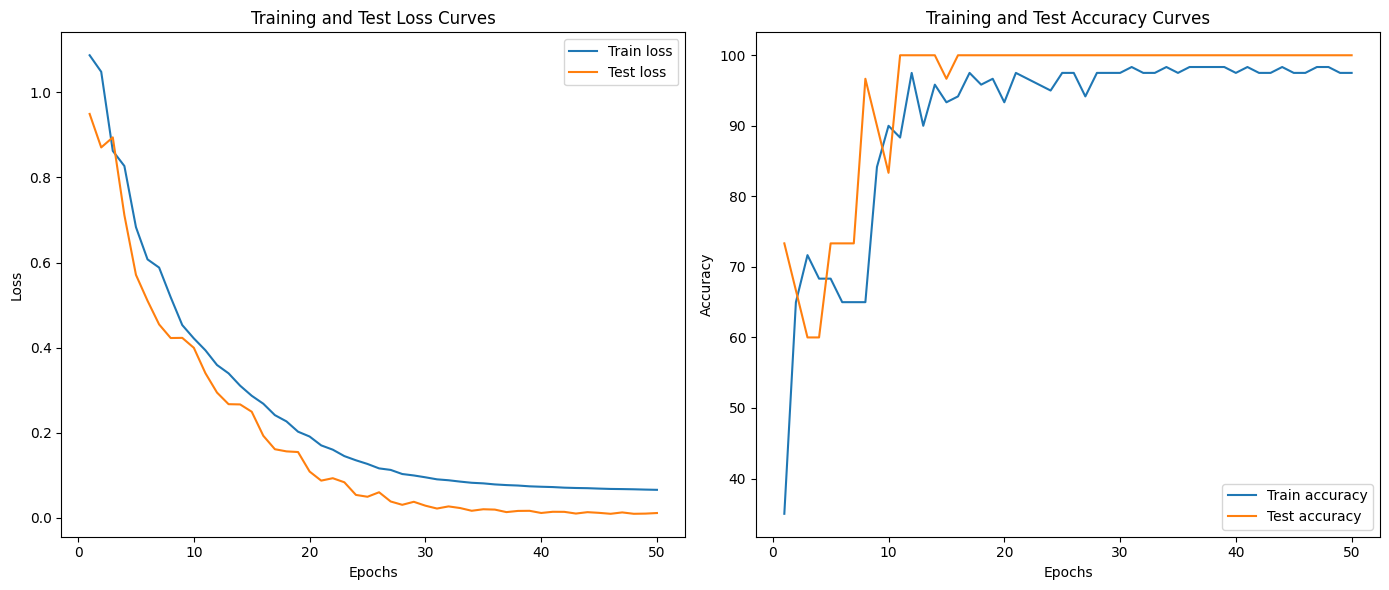

In [ ]:
# Create subplots with two columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the loss curves
axs[0].plot(epoch_count, train_loss_values, label="Train loss")
axs[0].plot(epoch_count, test_loss_values, label="Test loss")
axs[0].set_title("Training and Test Loss Curves")
axs[0].set_ylabel("Loss")
axs[0].set_xlabel("Epochs")
axs[0].legend()

# Plot the accuracy curves
axs[1].plot(epoch_count, train_acc_values, label="Train accuracy")
axs[1].plot(epoch_count, test_acc_values, label="Test accuracy")
axs[1].set_title("Training and Test Accuracy Curves")
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

### Make predictions

In [ ]:
# Get final test accuracy
y_preds = make_predictions(model_2, X_test, y_test)

Test accuracy: 100.00%


### Confusion Matrix

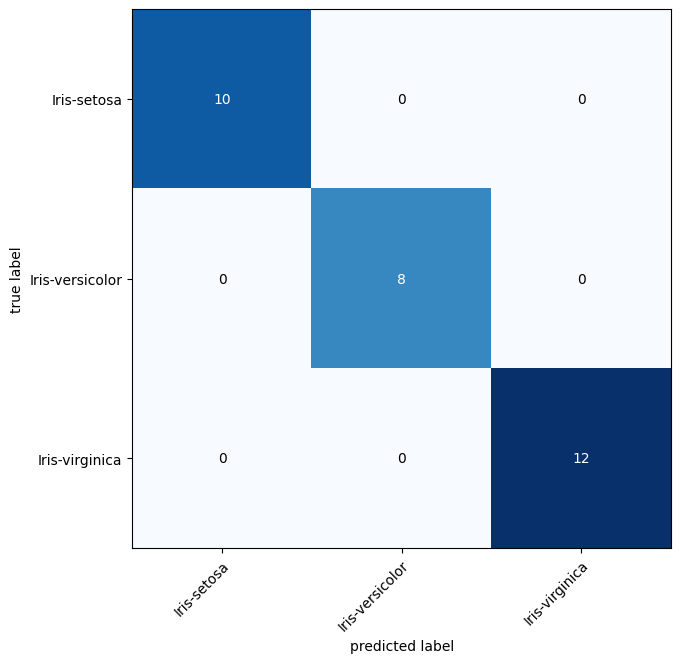

In [ ]:
# Plot confusion matrix
plot_confusion_mat(y_preds, y_test, unique_classes)

### Compare the models

In [ ]:
# Compare the different models using a dataframe
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results]).round(2)
compare_results

,model_name,train_loss,train_acc,test_loss,test_acc
0,IrisModelV0,0.36,96.67,0.34,100.0
1,IrisModelV1,0.22,95.83,0.19,100.0
2,IrisModelV2,0.07,97.50,0.01,100.0


## 1.ΣΤ

In [ ]:
# Function that returns the probabilities of the predictions of a model on the test set
def make_predictions_return_probs(model: torch.nn.Module, X_test: torch.tensor):
  model.eval() # Set evaluation mode

  with torch.inference_mode():
    y_logits = model(X_test)
    # Turn predicted logits in prediction probabilities
    y_pred_probs = torch.softmax(y_logits, dim=1)
    # Turn prediction probabilities into prediction labels
    # y_preds = y_pred_probs.argmax(dim=1)

  return y_pred_probs

In [ ]:
# Function that plots the presicion recall curves for the different classes and thresholds
def plot_precision_recall_curves(model: torch.nn.Module, X_test: torch.tensor, y_test: torch.tensor, num_classes: int):
  # Take the probabilities from the given model
  y_pred_probs = make_predictions_return_probs(model, X_test)

  # Transfer to CPU
  y_pred_probs = y_pred_probs.cpu()
  y_test = y_test.cpu()

  # Create subplots
  fig, axs = plt.subplots(1, num_classes, figsize=(15, 5))

  # Specify colors for each class
  colors = ['red', 'green', 'blue']

  for i in range(num_classes):
    y_preds_probs_class = y_pred_probs[:, i].detach().numpy() # Probabilities of the current class, transfer to CPU and convert to numpy

    # Compute precision-recall pairs for the current class
    precision, recall, thresholds = precision_recall_curve(y_test, y_preds_probs_class, pos_label=i)

    # Calculate AUC for Precision-Recall curve
    auc_score = auc(recall, precision)

    # Plot the Precision-Recall curve in the i-th subplot with the specified color
    axs[i].plot(recall, precision, label=f'Class {i} (AUC = {auc_score:.2f})', color=colors[i])

    # Set labels and title for the subplot
    axs[i].set_xlabel('Recall')
    axs[i].set_ylabel('Precision')
    axs[i].set_title(f'Precision-Recall Curve - Class {i}')
    axs[i].legend()

  # Adjust layout to prevent clipping of labels
  plt.tight_layout()
  plt.show()

In [ ]:
# Worst model
# plot_precision_recall_curves(model_0, X_test, y_test, num_classes)

In [ ]:
# Middle model
# plot_precision_recall_curves(model_1, X_test, y_test, num_classes)

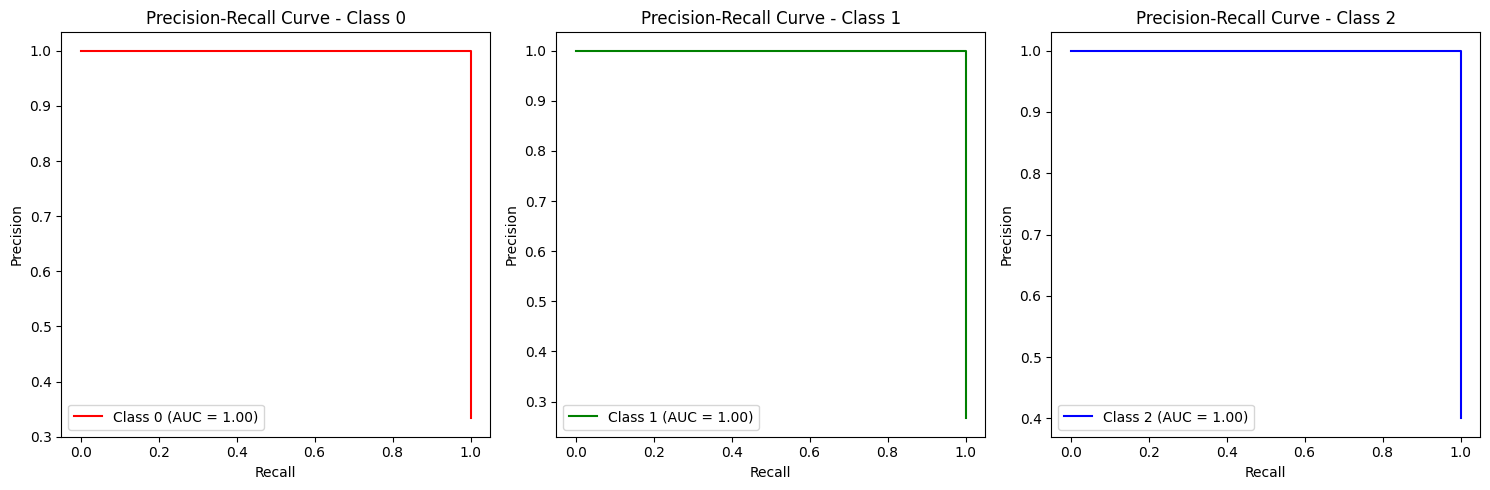

In [ ]:
# Best model
plot_precision_recall_curves(model_2, X_test, y_test, num_classes)

In [ ]:
# # Function that makes predictions using a threshold

# def make_predictions_with_threshold(model: torch.nn.Module, X_test: torch.tensor, threshold: float):
#   model.eval()

#   with torch.inference_mode():
#     y_logits = model(X_test)

#     # Turn predicted logits in prediction probabilities
#     y_pred_probs = torch.softmax(y_logits, dim=1) # torch.Size([number_of_saples, Number_of_classes])

#     # Turn prediction probabilities into prediction labels
#     y_preds = y_pred_probs.argmax(dim=1)

#     # Apply threshold to predicted probabilities for each class independently, put -1 if probability is < threshold, else put the id of the predicted class
#     # y_pred_probs.max(dim=1).values is the max probability for each sample, the probability of the predicted class
#     predictions = torch.where(y_pred_probs.max(dim=1).values >= threshold, y_preds, torch.tensor(-1)) # -1 means not very confident prediction

#   # Print test accuracy, new accuracy using filtered predictions
#   print(f"Test acc for all classes for threshold = {threshold} is: {accuracy_fn(y_true=y_test, y_pred=predictions):.2f}%")

#   return predictions

## Bonus (Cifar 10)

Οι συναρτήσεις για εκπαίδευση και αξιολόγηση του νευρωνικού δικτύου που χρησιμοποιήσαμε δεν δουλεύουν για batches, οπότε εδώ θα τις αλλάξουμε λίγο.

In [ ]:
# Load Dataset
training_data = datasets.CIFAR10(
    root="Cifar10",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="Cifar10",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 170498071/170498071 [00:03<00:00, 54260254.19it/s]


Extracting Cifar10/cifar-10-python.tar.gz to Cifar10
Files already downloaded and verified


In [ ]:
# Define Dataloaders
batch_size = 128
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True) # Data will be shuffled at the beginning of each epoch
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [ ]:
# Classes
class_names = training_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

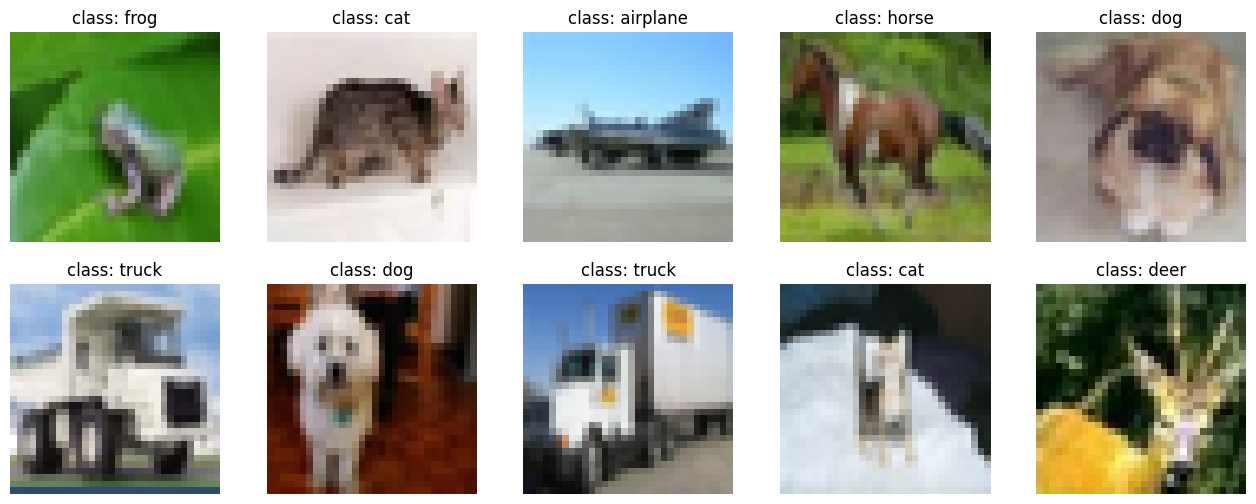

In [ ]:
# Function that displays random images from the dataset
def display_random_images(dataset: torch.utils.data.dataset.Dataset, classes: list = None, num_images: int = 10, columns: int = 5, display_shape: bool = True, seed: int = None):
  if seed is not None:
      random.seed(seed)

  num_rows = math.ceil(num_images / columns) # Calculate the number of rows needed
  plt.figure(figsize=(16, 6))

  for i in range(num_images):
    if i >= len(dataset):
      break

    targ_sample = random.randint(0, len(dataset) - 1)
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1, 2, 0)

    # Create a subplot for each image
    plt.subplot(num_rows, 5, i + 1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    plt.imshow(targ_image_adjust.squeeze())

    if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
      plt.title(title)

display_random_images(training_data, num_images=10, classes=class_names, seed=RANDOM_SEED, display_shape=False)

In [ ]:
# Display the dimensions of a random image from training set
targ_sample = 1
img, label = training_data[targ_sample][0], training_data[targ_sample][1]
img_Channels, img_Width, img_Height = img.shape

print(f"Image Channels: {img_Channels}")
print(f"Image Width: {img_Width}")
print(f"Image Height: {img_Height}")

Image Channels: 3
Image Width: 32
Image Height: 32


In [ ]:
# Hyperparameters to tune, for comparing models these must not be changed
EPOCHS = 25
LEARNING_RATE = 0.001

In [ ]:
# Train and test now work for mini batches

# Function that performs a training step during one epoch
def train_step_batch(model: torch.nn.Module,
                     dataloader: torch.utils.data.DataLoader,
                     loss_fn: torch.nn.Module,
                     optimizer: torch.optim.Optimizer):

    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() # Get the number of the tensor as float

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

# Function that performs a testing (evaluation) step during one epoch
def eval_step_batch(model: torch.nn.Module,
                    dataloader: torch.utils.data.DataLoader,
                    loss_fn: torch.nn.Module):

    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    val_loss, val_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            val_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(val_pred_logits, y)
            val_loss += loss.item()

            # Calculate and accumulate accuracy
            val_pred_labels = val_pred_logits.argmax(dim=1)
            val_acc += ((val_pred_labels == y).sum().item()/len(val_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    val_loss = val_loss / len(dataloader)
    val_acc = val_acc / len(dataloader)
    return val_loss, val_acc

# Function for training the model, works wih mini batces
# 1. Take in various parameters required for training and test steps
def train_batch(model: torch.nn.Module,
                train_dataloader: torch.utils.data.DataLoader,
                test_dataloader: torch.utils.data.DataLoader,
                optimizer: torch.optim.Optimizer,
                loss_fn: torch.nn.Module):

    # 2. Create empty list for the results
    train_loss_list = []
    train_acc_list = []
    test_loss_list = []
    test_acc_list =  []

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(1, EPOCHS+1)):
        train_loss, train_acc = train_step_batch(model=model,
                                                 dataloader=train_dataloader,
                                                 loss_fn=loss_fn,
                                                 optimizer=optimizer)

        test_loss, test_acc = eval_step_batch(model=model,
                                            dataloader=test_dataloader,
                                            loss_fn=loss_fn)

        # Append the results to lists
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)

        # Print every epoch
        print(
            f"Epoch: {epoch} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}")

    # 6. Return the filled results at the end of the epochs
    return train_loss_list, train_acc_list, test_loss_list,test_acc_list

In [ ]:
# Function that returns predictions and probabilities of the model on training set, works wih mini batces
def make_predictions_batch(model: torch.nn.Module,
                           test_dataloader: torch.utils.data.DataLoader,
                           optimizer: torch.optim.Optimizer,
                           loss_fn: torch.nn.Module):

  # Make predictions with trained model
  y_preds = []
  y_probs = []
  model.eval()
  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
      # Send data and targets to target device
      X, y = X.to(device), y.to(device)

      # 1. Do the forward pass
      y_logit = model(X)

      # 2. Calculate the loss and accumulate loss
      loss = loss_fn(y_logit, y)
      test_loss += loss.item()

      # Turn predictions from logits -> prediction probabilities -> predictions labels
      y_prob = torch.softmax(y_logit, dim=1)
      y_pred = y_prob.argmax(dim=1)

      # Calculate and accumulate accuracy
      test_acc += ((y_pred == y).sum().item()/len(y_pred))

      # Put predictions on CPU for evaluation
      y_preds.append(y_pred.cpu())
      y_probs.append(y_prob.cpu())

  # Concatenate list of predictions into a tensor and probabilities
  y_pred_tensor = torch.cat(y_preds)
  y_prob_tensor = torch.cat(y_probs)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(test_dataloader)
  test_acc = test_acc / len(test_dataloader)

  # Print test accuracy
  print(f"Testing Results: test_loss: {test_loss:.4f} | "f"test_acc: {test_acc*100:.2f}%")

  return y_pred_tensor, y_prob_tensor

In [ ]:
# Function that creates one plot for loss vs epochs and one for accuracy vs epochs
def plot_loss_curves(train_loss: list, train_acc: list, test_loss: list, test_acc: list):

    # Figure out how many epochs there were
    epochs = range(len(train_loss))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='train_loss')
    plt.plot(epochs, test_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='train_accuracy')
    plt.plot(epochs, test_acc, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

    # Show the plots
    plt.show()

In [ ]:
class Cifar10ModelV0(nn.Module): # [Flatten image -> Input (number of features)] -> Hidden layer 1 (hidden_units) - sigmoid activation -> Output layer (number of classes)
  def __init__(self, input_shape: int, output_shape: int, hidden_units: int): # Define model architecture
    super().__init__()
    self.flatten = nn.Flatten()
    self.input_layer = nn.Linear(in_features=input_shape, out_features=hidden_units)
    self.output_layer = nn.Linear(in_features=hidden_units, out_features=output_shape)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x: torch.Tensor): # Define the forward method
    x = self.flatten(x)
    x = self.input_layer(x)
    x = self.sigmoid(x)
    return self.output_layer(x)

# For reproducability
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

model_0 = Cifar10ModelV0(input_shape=img_Width*img_Height*img_Channels, output_shape=len(class_names), hidden_units=30).to(device) # Send model to device (very important if a GPU is used)

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss() # For multiclass classification
optimizer = torch.optim.Adam(model_0.parameters(), lr=LEARNING_RATE) # Use Adams optimizer

# Train model
train_loss_list, train_acc_list, test_loss_list, test_acc_list = train_batch(model=model_0,
                                                                             train_dataloader=train_dataloader,
                                                                             test_dataloader=test_dataloader,
                                                                             optimizer=optimizer,
                                                                             loss_fn=loss_fn,
                                                                             epochs=EPOCHS)

# Calculate model 0 results, keep a dictionary for comparing the models at the end
model_0_results = {"model_name": model_0.__class__.__name__,
                   "train_loss": train_loss_list[-1],
                   "train_acc": train_acc_list[-1],
                   "test_loss": test_loss_list[-1],
                   "test_acc": test_acc_list[-1]}

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.0214 | train_acc: 0.2928 | test_loss: 1.8843 | test_acc: 0.3417
Epoch: 2 | train_loss: 1.8345 | train_acc: 0.3556 | test_loss: 1.8090 | test_acc: 0.3661
Epoch: 3 | train_loss: 1.7690 | train_acc: 0.3769 | test_loss: 1.7704 | test_acc: 0.3791
Epoch: 4 | train_loss: 1.7248 | train_acc: 0.3945 | test_loss: 1.7166 | test_acc: 0.3945
Epoch: 5 | train_loss: 1.6953 | train_acc: 0.4063 | test_loss: 1.6851 | test_acc: 0.4054
Epoch: 6 | train_loss: 1.6646 | train_acc: 0.4182 | test_loss: 1.6769 | test_acc: 0.4002
Epoch: 7 | train_loss: 1.6412 | train_acc: 0.4263 | test_loss: 1.6531 | test_acc: 0.4142
Epoch: 8 | train_loss: 1.6217 | train_acc: 0.4309 | test_loss: 1.6307 | test_acc: 0.4228
Epoch: 9 | train_loss: 1.5973 | train_acc: 0.4407 | test_loss: 1.6238 | test_acc: 0.4197
Epoch: 10 | train_loss: 1.5816 | train_acc: 0.4460 | test_loss: 1.6525 | test_acc: 0.4109
Epoch: 11 | train_loss: 1.5697 | train_acc: 0.4486 | test_loss: 1.6285 | test_acc: 0.4263
Epoch: 12 | train_l

In [ ]:
# Make Predictios
predictions_tensor_model_0, _ = make_predictions_batch(model=model_0,
                                                       test_dataloader=test_dataloader,
                                                       optimizer=optimizer,
                                                       loss_fn=loss_fn)

Making predictions:   0%|          | 0/79 [00:00<?, ?it/s]

Testing Results: test_loss: 1.5450 | test_acc: 44.48%


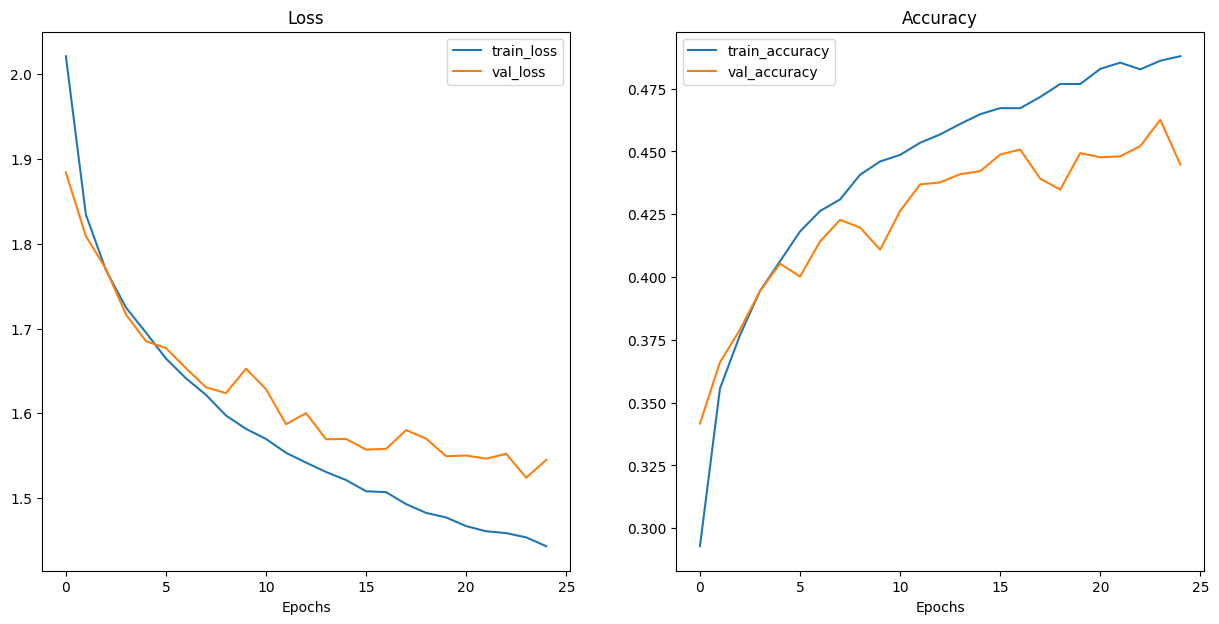

In [ ]:
# Plot train/val loss and accuracy
plot_loss_curves(train_loss_list, train_acc_list, test_loss_list, test_acc_list)

In [ ]:
class Cifar10ModelV1(nn.Module): # [Flatten image -> Input (number of features)] -> Hidden layer 1 (hidden_units) - relu activation -> Output layer (number of classes)
  def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
    super().__init__()
    self.flatten = nn.Flatten()
    self.input_layer = nn.Linear(in_features=input_shape, out_features=hidden_units)
    self.output_layer = nn.Linear(in_features=hidden_units, out_features=output_shape)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor):
    x = self.flatten(x)
    x = self.input_layer(x)
    x = self.relu(x)
    return self.output_layer(x)

# For reproducability
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

model_1 = Cifar10ModelV1(input_shape=img_Width*img_Height*img_Channels, output_shape=len(class_names), hidden_units = 30).to(device) # Send model to device (very important if a GPU is used)

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss() # For multiclass classification
optimizer = torch.optim.Adam(model_1.parameters(), lr=LEARNING_RATE) # Use Adams optimizer

# Train model
train_loss_list, train_acc_list, test_loss_list, test_acc_list = train_batch(model=model_1,
                                                                             train_dataloader=train_dataloader,
                                                                             test_dataloader=test_dataloader,
                                                                             optimizer=optimizer,
                                                                             loss_fn=loss_fn,
                                                                             epochs=EPOCHS)

# Calculate model 1 results, keep a dictionary for comparing the models at the end
model_1_results = {"model_name": model_1.__class__.__name__,
                   "train_loss": train_loss_list[-1],
                   "train_acc": train_acc_list[-1],
                   "test_loss": test_loss_list[-1],
                   "test_acc": test_acc_list[-1]}

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.9771 | train_acc: 0.2786 | test_loss: 1.8540 | test_acc: 0.3356
Epoch: 2 | train_loss: 1.8258 | train_acc: 0.3461 | test_loss: 1.7912 | test_acc: 0.3604
Epoch: 3 | train_loss: 1.7759 | train_acc: 0.3699 | test_loss: 1.7534 | test_acc: 0.3689
Epoch: 4 | train_loss: 1.7474 | train_acc: 0.3801 | test_loss: 1.7389 | test_acc: 0.3780
Epoch: 5 | train_loss: 1.7220 | train_acc: 0.3877 | test_loss: 1.7021 | test_acc: 0.3930
Epoch: 6 | train_loss: 1.7070 | train_acc: 0.3928 | test_loss: 1.7146 | test_acc: 0.3851
Epoch: 7 | train_loss: 1.6970 | train_acc: 0.3933 | test_loss: 1.6883 | test_acc: 0.3918
Epoch: 8 | train_loss: 1.6907 | train_acc: 0.3979 | test_loss: 1.6846 | test_acc: 0.3940
Epoch: 9 | train_loss: 1.6752 | train_acc: 0.4060 | test_loss: 1.6839 | test_acc: 0.3945
Epoch: 10 | train_loss: 1.6690 | train_acc: 0.4065 | test_loss: 1.7225 | test_acc: 0.3845
Epoch: 11 | train_loss: 1.6666 | train_acc: 0.4055 | test_loss: 1.7203 | test_acc: 0.3804
Epoch: 12 | train_l

In [ ]:
# Make Predictios
predictions_tensor_model_1, _ = make_predictions_batch(model=model_1,
                                                       test_dataloader=test_dataloader,
                                                       optimizer=optimizer,
                                                       loss_fn=loss_fn)

Making predictions:   0%|          | 0/79 [00:00<?, ?it/s]

Testing Results: test_loss: 1.6483 | test_acc: 41.18%


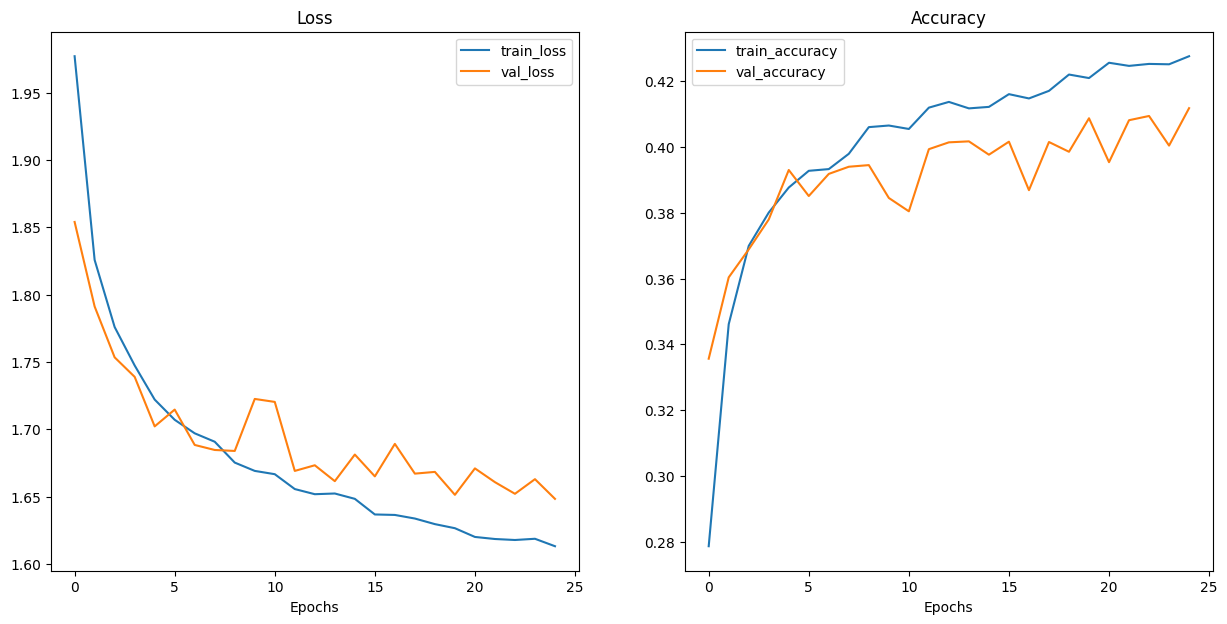

In [ ]:
# Plot train/val loss and accuracy
plot_loss_curves(train_loss_list, train_acc_list, test_loss_list, test_acc_list)

In [ ]:
class Cifar10ModelV2(nn.Module): # [Flatten image -> Input (number of features)] -> Hidden layer 1 (hidden_units) - sigmoid activation -> Hidden layer 2 (hidden_units) - sigmoid activation
                                 # -> Output layer (number of classes)

  def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
    super().__init__()
    self.flatten = nn.Flatten()
    self.input_layer = nn.Linear(in_features=input_shape, out_features=hidden_units)
    self.hidden_layer = nn.Linear(in_features=hidden_units, out_features=hidden_units)
    self.output_layer = nn.Linear(in_features=hidden_units, out_features=output_shape)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x: torch.Tensor):
    x = self.flatten(x)
    x = self.sigmoid(self.input_layer(x))
    x = self.sigmoid(self.hidden_layer(x))
    return self.output_layer(x)

# For reproducability
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

model_2 = Cifar10ModelV2(input_shape=img_Width*img_Height*img_Channels, output_shape=len(class_names), hidden_units = 60).to(device) # Send model to device (very important if a GPU is used)

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss() # For multiclass classification
optimizer = torch.optim.Adam(model_2.parameters(), lr=LEARNING_RATE) # Use Adams optimizer

# Train model
train_loss_list, train_acc_list, test_loss_list, test_acc_list = train_batch(model=model_2,
                                                                             train_dataloader=train_dataloader,
                                                                             test_dataloader=test_dataloader,
                                                                             optimizer=optimizer,
                                                                             loss_fn=loss_fn,
                                                                             epochs=EPOCHS)

# Calculate model 1 results, keep a dictionary for comparing the models at the end
model_2_results = {"model_name": model_2.__class__.__name__,
                   "train_loss": train_loss_list[-1],
                   "train_acc": train_acc_list[-1],
                   "test_loss": test_loss_list[-1],
                   "test_acc": test_acc_list[-1]}

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.1119 | train_acc: 0.2050 | test_loss: 1.9835 | test_acc: 0.2704
Epoch: 2 | train_loss: 1.9078 | train_acc: 0.3006 | test_loss: 1.8490 | test_acc: 0.3277
Epoch: 3 | train_loss: 1.8194 | train_acc: 0.3425 | test_loss: 1.7721 | test_acc: 0.3645
Epoch: 4 | train_loss: 1.7547 | train_acc: 0.3674 | test_loss: 1.7292 | test_acc: 0.3750
Epoch: 5 | train_loss: 1.7110 | train_acc: 0.3829 | test_loss: 1.7392 | test_acc: 0.3712
Epoch: 6 | train_loss: 1.6751 | train_acc: 0.3965 | test_loss: 1.6790 | test_acc: 0.3961
Epoch: 7 | train_loss: 1.6514 | train_acc: 0.4041 | test_loss: 1.6524 | test_acc: 0.4053
Epoch: 8 | train_loss: 1.6190 | train_acc: 0.4168 | test_loss: 1.6159 | test_acc: 0.4186
Epoch: 9 | train_loss: 1.5981 | train_acc: 0.4239 | test_loss: 1.6052 | test_acc: 0.4184
Epoch: 10 | train_loss: 1.5821 | train_acc: 0.4323 | test_loss: 1.6025 | test_acc: 0.4251
Epoch: 11 | train_loss: 1.5618 | train_acc: 0.4374 | test_loss: 1.6090 | test_acc: 0.4199
Epoch: 12 | train_l

In [ ]:
# Make Predictios
predictions_tensor_model_2, probabilities_tensor_model_2 = make_predictions_batch(model=model_2,
                                                                                  test_dataloader=test_dataloader,
                                                                                  optimizer=optimizer,
                                                                                  loss_fn=loss_fn)

Making predictions:   0%|          | 0/79 [00:00<?, ?it/s]

Testing Results: test_loss: 1.5260 | test_acc: 45.19%


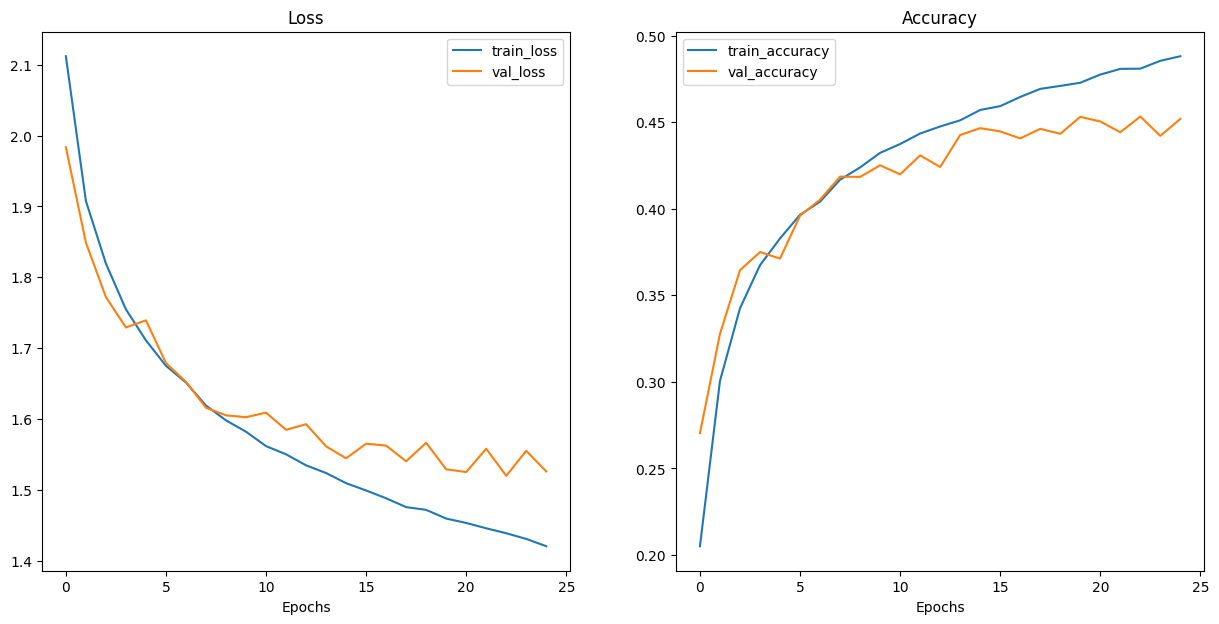

In [ ]:
# Plot train/val loss and accuracy
plot_loss_curves(train_loss_list, train_acc_list, test_loss_list, test_acc_list)

In [ ]:
class Cifar10ModelV3(nn.Module): # [Flatten image -> Input (number of features)] -> Hidden layer 1 (hidden_units) - relu activation -> Hidden layer 2 (hidden_units) - relu activation
                                 # -> Output layer (number of classes)

  def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
    super().__init__()
    self.flatten = nn.Flatten()
    self.input_layer = nn.Linear(in_features=input_shape, out_features=hidden_units)
    self.hidden_layer = nn.Linear(in_features=hidden_units, out_features=hidden_units)
    self.output_layer = nn.Linear(in_features=hidden_units, out_features=output_shape)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor):
    x = self.flatten(x)
    x = self.relu(self.input_layer(x))
    x = self.relu(self.hidden_layer(x))
    return self.output_layer(x)

# For reproducability
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

model_3 = Cifar10ModelV3(input_shape=img_Width*img_Height*img_Channels, output_shape=len(class_names), hidden_units = 60).to(device) # Send model to device (very important if a GPU is used)

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss() # For multiclass classification
optimizer = torch.optim.Adam(model_3.parameters(), lr=LEARNING_RATE) # Use Adams optimizer

# Train model
train_loss_list, train_acc_list, test_loss_list, test_acc_list = train_batch(model=model_3,
                                                                             train_dataloader=train_dataloader,
                                                                             test_dataloader=test_dataloader,
                                                                             optimizer=optimizer,
                                                                             loss_fn=loss_fn,
                                                                             epochs=EPOCHS)

# Calculate model 1 results, keep a dictionary for comparing the models at the end
model_3_results = {"model_name": model_3.__class__.__name__,
                   "train_loss": train_loss_list[-1],
                   "train_acc": train_acc_list[-1],
                   "test_loss": test_loss_list[-1],
                   "test_acc": test_acc_list[-1]}

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.9126 | train_acc: 0.3020 | test_loss: 1.7685 | test_acc: 0.3669
Epoch: 2 | train_loss: 1.7232 | train_acc: 0.3822 | test_loss: 1.6866 | test_acc: 0.3968
Epoch: 3 | train_loss: 1.6517 | train_acc: 0.4110 | test_loss: 1.6043 | test_acc: 0.4246
Epoch: 4 | train_loss: 1.6009 | train_acc: 0.4291 | test_loss: 1.5834 | test_acc: 0.4337
Epoch: 5 | train_loss: 1.5631 | train_acc: 0.4443 | test_loss: 1.5739 | test_acc: 0.4358
Epoch: 6 | train_loss: 1.5371 | train_acc: 0.4514 | test_loss: 1.5403 | test_acc: 0.4489
Epoch: 7 | train_loss: 1.5135 | train_acc: 0.4587 | test_loss: 1.5390 | test_acc: 0.4506
Epoch: 8 | train_loss: 1.4913 | train_acc: 0.4655 | test_loss: 1.5229 | test_acc: 0.4553
Epoch: 9 | train_loss: 1.4770 | train_acc: 0.4728 | test_loss: 1.5069 | test_acc: 0.4613
Epoch: 10 | train_loss: 1.4616 | train_acc: 0.4784 | test_loss: 1.4884 | test_acc: 0.4736
Epoch: 11 | train_loss: 1.4459 | train_acc: 0.4828 | test_loss: 1.4860 | test_acc: 0.4740
Epoch: 12 | train_l

In [ ]:
# Make Predictios
predictions_tensor_model_3, probabilities_tensor_model_3 = make_predictions_batch(model=model_3,
                                                                                  test_dataloader=test_dataloader,
                                                                                  optimizer=optimizer,
                                                                                  loss_fn=loss_fn)

Making predictions:   0%|          | 0/79 [00:00<?, ?it/s]

Testing Results: test_loss: 1.4281 | test_acc: 49.32%


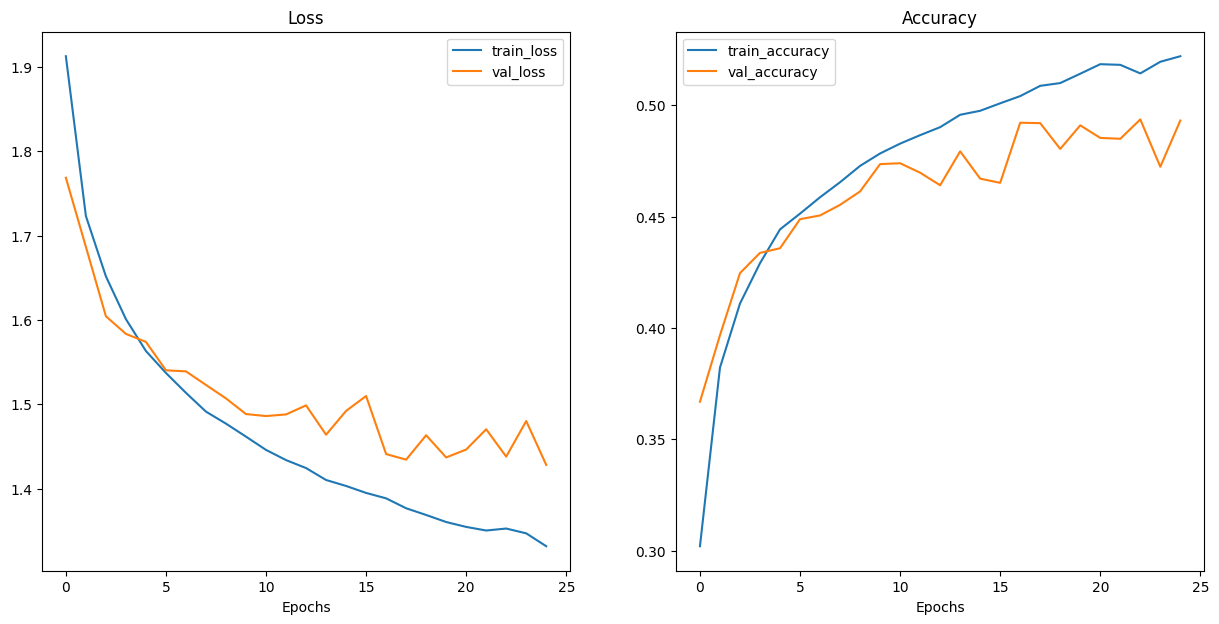

In [ ]:
# Plot train/val loss and accuracy
plot_loss_curves(train_loss_list, train_acc_list, test_loss_list, test_acc_list)

In [ ]:
class Cifar10ModelV4(nn.Module): # [Flatten image -> Input (number of features)] -> Hidden layer 1 (hidden_units 1) - relu activation -> Hidden layer 2 (hidden_units 2) - relu activation
                                 # -> ... -> Hidden layer 5 (hidden_units 5) - relu activation -> Output layer (number of classes)

  def __init__(self, input_shape: int, output_shape: int, hidden_units_1: int, hidden_units_2: int, hidden_units_3: int, hidden_units_4: int, hidden_units_5: int):
    super().__init__()
    self.flatten = nn.Flatten()
    self.input_layer = nn.Linear(in_features=input_shape, out_features=hidden_units_1)
    self.hidden_layer1 = nn.Linear(in_features=hidden_units_1, out_features=hidden_units_2)
    self.hidden_layer2 = nn.Linear(in_features=hidden_units_2, out_features=hidden_units_3)
    self.hidden_layer3 = nn.Linear(in_features=hidden_units_3, out_features=hidden_units_4)
    self.hidden_layer4 = nn.Linear(in_features=hidden_units_4, out_features=hidden_units_5)
    self.output_layer = nn.Linear(in_features=hidden_units_5, out_features=output_shape)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor):
    x = self.flatten(x)
    x = self.relu(self.input_layer(x))
    x = self.relu(self.hidden_layer1(x))
    x = self.relu(self.hidden_layer2(x))
    x = self.relu(self.hidden_layer3(x))
    x = self.relu(self.hidden_layer4(x))
    return self.output_layer(x)

# For reproducability
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

model_4 = Cifar10ModelV4(input_shape=img_Width*img_Height*img_Channels, output_shape=len(class_names),
                         hidden_units_1=512, hidden_units_2=256, hidden_units_3=128, hidden_units_4=64, hidden_units_5=32).to(device)
                         # Send model to device (very important if a GPU is used)

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss() # For multiclass classification
optimizer = torch.optim.Adam(model_4.parameters(), lr=LEARNING_RATE) # Use Adams optimizer

# Train model
train_loss_list, train_acc_list, test_loss_list, test_acc_list = train_batch(model=model_4,
                                                                             train_dataloader=train_dataloader,
                                                                             test_dataloader=test_dataloader,
                                                                             optimizer=optimizer,
                                                                             loss_fn=loss_fn,
                                                                             epochs=EPOCHS)

# Calculate model 1 results, keep a dictionary for comparing the models at the end
model_4_results = {"model_name": model_4.__class__.__name__,
                   "train_loss": train_loss_list[-1],
                   "train_acc": train_acc_list[-1],
                   "test_loss": test_loss_list[-1],
                   "test_acc": test_acc_list[-1]}

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.9836 | train_acc: 0.2574 | test_loss: 1.8308 | test_acc: 0.3192
Epoch: 2 | train_loss: 1.7748 | train_acc: 0.3549 | test_loss: 1.7442 | test_acc: 0.3622
Epoch: 3 | train_loss: 1.6757 | train_acc: 0.3943 | test_loss: 1.6388 | test_acc: 0.4077
Epoch: 4 | train_loss: 1.6139 | train_acc: 0.4165 | test_loss: 1.5683 | test_acc: 0.4378
Epoch: 5 | train_loss: 1.5506 | train_acc: 0.4404 | test_loss: 1.5491 | test_acc: 0.4492
Epoch: 6 | train_loss: 1.5137 | train_acc: 0.4552 | test_loss: 1.5016 | test_acc: 0.4596
Epoch: 7 | train_loss: 1.4716 | train_acc: 0.4722 | test_loss: 1.4970 | test_acc: 0.4659
Epoch: 8 | train_loss: 1.4405 | train_acc: 0.4847 | test_loss: 1.5277 | test_acc: 0.4550
Epoch: 9 | train_loss: 1.4059 | train_acc: 0.4962 | test_loss: 1.4517 | test_acc: 0.4843
Epoch: 10 | train_loss: 1.3796 | train_acc: 0.5059 | test_loss: 1.4321 | test_acc: 0.4915
Epoch: 11 | train_loss: 1.3509 | train_acc: 0.5167 | test_loss: 1.4090 | test_acc: 0.4927
Epoch: 12 | train_l

In [ ]:
# Make Predictios
predictions_tensor_model_4, probabilities_tensor_model_4 = make_predictions_batch(model=model_4,
                                                                                  test_dataloader=test_dataloader,
                                                                                  optimizer=optimizer,
                                                                                  loss_fn=loss_fn)

Making predictions:   0%|          | 0/79 [00:00<?, ?it/s]

Testing Results: test_loss: 1.3756 | test_acc: 53.20%


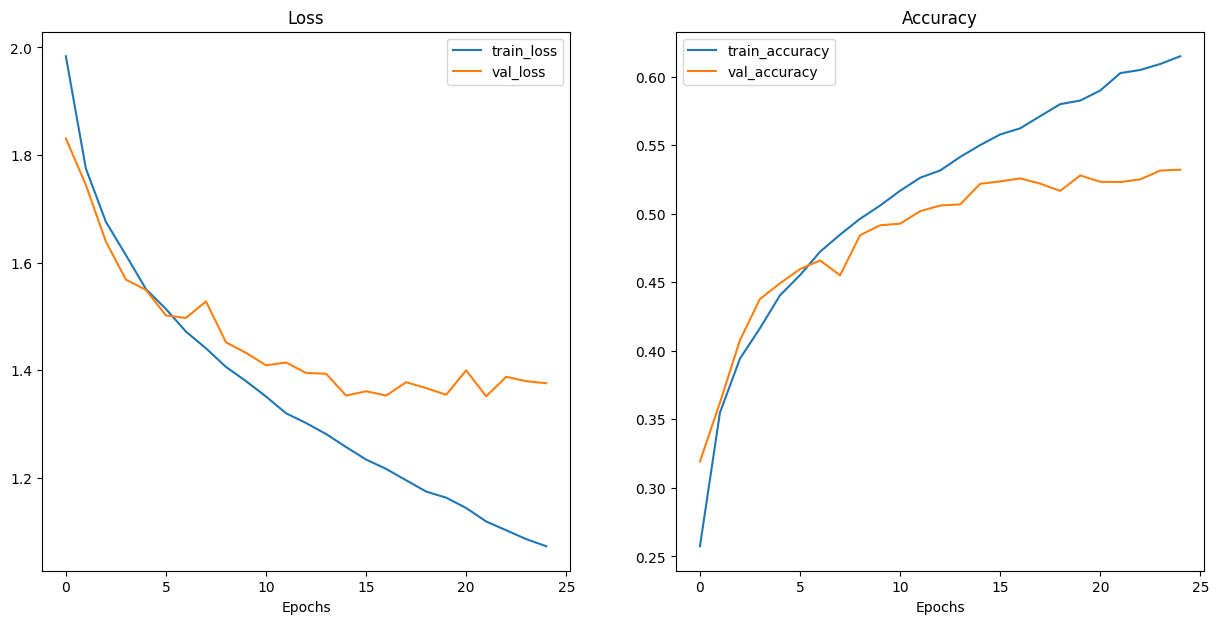

In [ ]:
# Plot train/val loss and accuracy
plot_loss_curves(train_loss_list, train_acc_list, test_loss_list, test_acc_list)

In [ ]:
# For reproducability
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

model_5 = Cifar10ModelV4(input_shape=img_Width*img_Height*img_Channels, output_shape=len(class_names),
                         hidden_units_1=32, hidden_units_2=64, hidden_units_3=128, hidden_units_4=256, hidden_units_5=512).to(device)
                         # Send model to device (very important if a GPU is used)

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss() # For multiclass classification
optimizer = torch.optim.Adam(model_5.parameters(), lr=LEARNING_RATE) # Use Adams optimizer

# Train model
train_loss_list, train_acc_list, test_loss_list, test_acc_list = train_batch(model=model_5,
                                                                             train_dataloader=train_dataloader,
                                                                             test_dataloader=test_dataloader,
                                                                             optimizer=optimizer,
                                                                             loss_fn=loss_fn,
                                                                             epochs=EPOCHS)

# Calculate model 1 results, keep a dictionary for comparing the models at the end
model_5_results = {"model_name": model_5.__class__.__name__,
                   "train_loss": train_loss_list[-1],
                   "train_acc": train_acc_list[-1],
                   "test_loss": test_loss_list[-1],
                   "test_acc": test_acc_list[-1]}

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.9431 | train_acc: 0.2789 | test_loss: 1.8203 | test_acc: 0.3384
Epoch: 2 | train_loss: 1.7817 | train_acc: 0.3528 | test_loss: 1.7692 | test_acc: 0.3562
Epoch: 3 | train_loss: 1.7226 | train_acc: 0.3718 | test_loss: 1.7226 | test_acc: 0.3711
Epoch: 4 | train_loss: 1.6745 | train_acc: 0.3903 | test_loss: 1.6591 | test_acc: 0.3958
Epoch: 5 | train_loss: 1.6447 | train_acc: 0.4048 | test_loss: 1.6436 | test_acc: 0.4048
Epoch: 6 | train_loss: 1.6167 | train_acc: 0.4144 | test_loss: 1.6004 | test_acc: 0.4255
Epoch: 7 | train_loss: 1.5972 | train_acc: 0.4189 | test_loss: 1.5951 | test_acc: 0.4237
Epoch: 8 | train_loss: 1.5830 | train_acc: 0.4287 | test_loss: 1.5892 | test_acc: 0.4254
Epoch: 9 | train_loss: 1.5599 | train_acc: 0.4343 | test_loss: 1.5827 | test_acc: 0.4346
Epoch: 10 | train_loss: 1.5550 | train_acc: 0.4402 | test_loss: 1.5573 | test_acc: 0.4382
Epoch: 11 | train_loss: 1.5368 | train_acc: 0.4430 | test_loss: 1.5715 | test_acc: 0.4327
Epoch: 12 | train_l

In [ ]:
# Make Predictios
predictions_tensor_model_5, probabilities_tensor_model_5 = make_predictions_batch(model=model_5,
                                                                                  test_dataloader=test_dataloader,
                                                                                  optimizer=optimizer,
                                                                                  loss_fn=loss_fn)

Making predictions:   0%|          | 0/79 [00:00<?, ?it/s]

Testing Results: test_loss: 1.5711 | test_acc: 44.38%


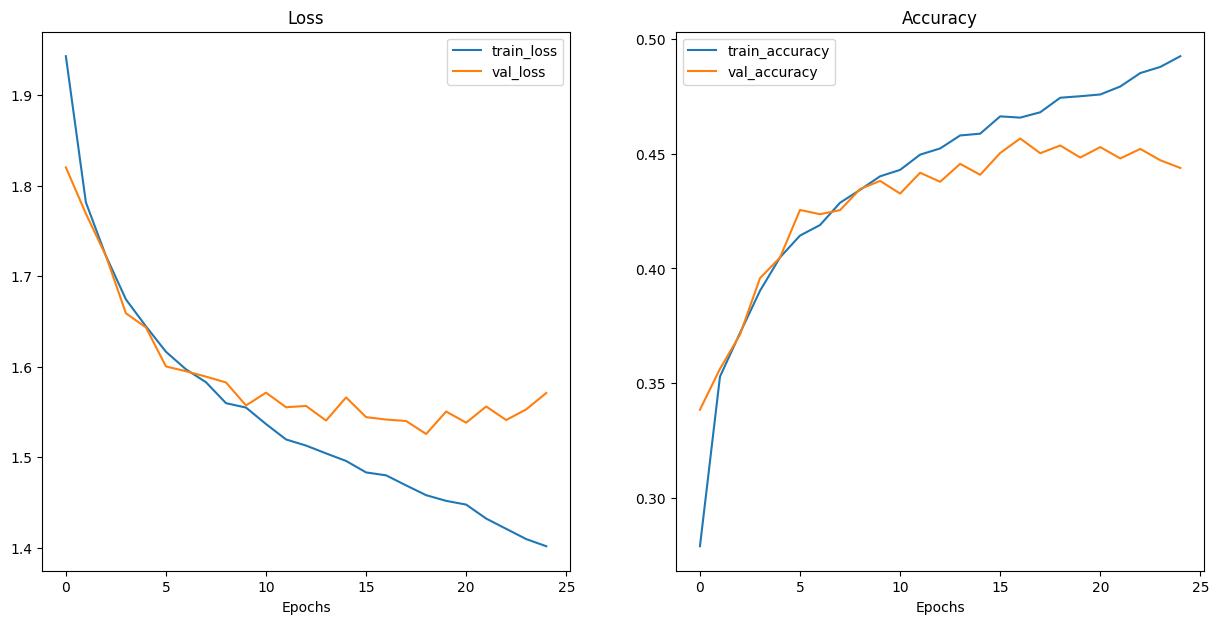

In [ ]:
# Plot train/val loss and accuracy
plot_loss_curves(train_loss_list, train_acc_list, test_loss_list, test_acc_list)

### Best Results

In [ ]:
# Function that plots the confusion matrix based on a model's predictions
def plot_confusion_mat(y_pred_tensor: torch.tensor, test_data: torch.utils.data.dataset.Dataset, class_names: list):
  # Setup confusion matrix instance and compare predictions to targets
  confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
  confmat_tensor = confmat(preds=y_pred_tensor,
                           target=torch.tensor(test_data.targets, dtype=torch.float))

  # Plot the confusion matrix
  fig, ax = plot_confusion_matrix(
      conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
      class_names=class_names, # turn the row and column labels into class names
      figsize=(10, 7)
  );

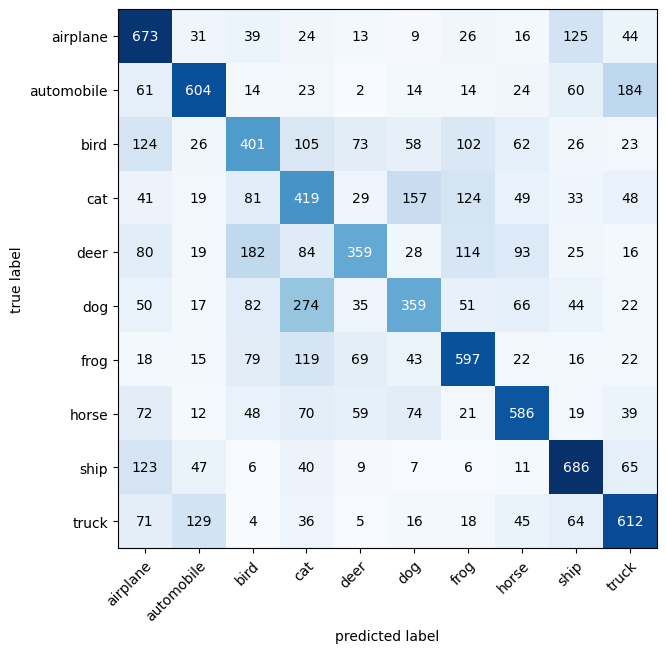

In [ ]:
# Plot Confusion Matrix
plot_confusion_mat(predictions_tensor_model_4, test_data, class_names)

In [ ]:
# Function that plots precision-recall curves for different classes and thresholds, based on the predictions of a model
def plot_precision_recall_curves(test_data: torch.utils.data.dataset.Dataset, y_probs: torch.tensor, num_classes: int):
    # Create subplots with 2 rows and 5 columns
    fig, axs = plt.subplots(2, 5, figsize=(18, 8))

    for i in range(num_classes):
        row = i // 5  # Determine the row index
        col = i % 5   # Determine the column index

        y_preds_probs_class = y_probs[:, i].detach().numpy()  # Probabilities of the current class, transfer to CPU and convert to numpy

        # Compute precision-recall pairs for the current class
        precision, recall, thresholds = precision_recall_curve(test_data.targets, y_preds_probs_class, pos_label=i)

        # Calculate AUC for Precision-Recall curve
        auc_score = auc(recall, precision)

        # Plot the Precision-Recall curve in the i-th subplot
        axs[row, col].plot(recall, precision, label=f'Class {i+1} (AUC = {auc_score:.2f})')

        # Set labels and title for the subplot
        axs[row, col].set_xlabel('Recall')
        axs[row, col].set_ylabel('Precision')
        axs[row, col].set_title(f'Precision-Recall Curve - Class {class_names[i]}')
        axs[row, col].legend()

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()
    plt.show()

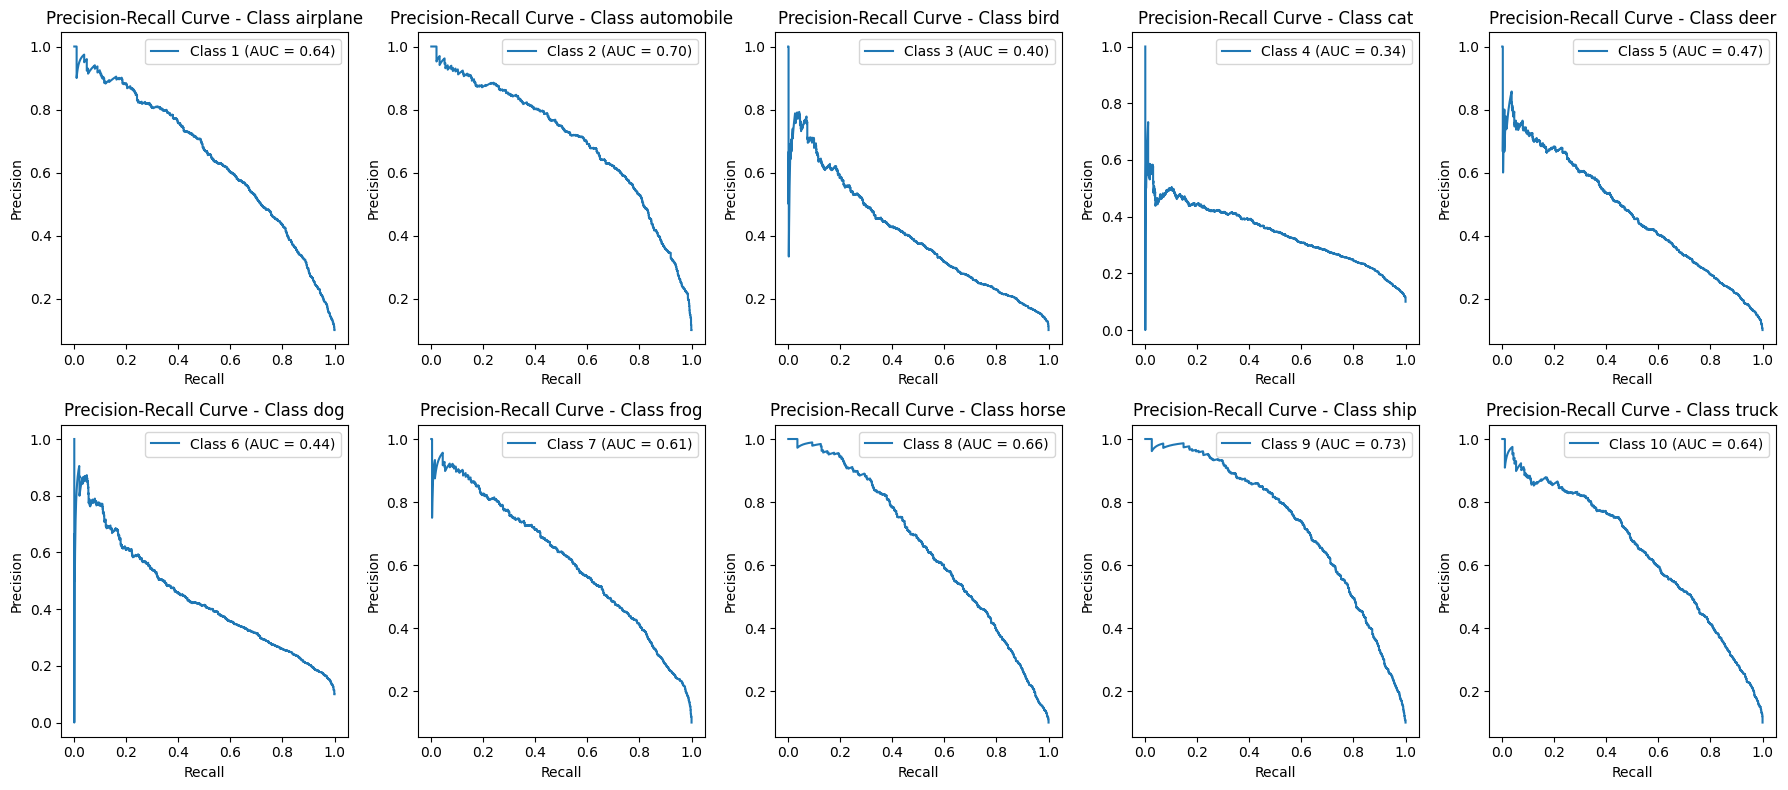

In [ ]:
# Plot precision recall curves
plot_precision_recall_curves(test_data, probabilities_tensor_model_4, len(class_names))

In [ ]:
# Compare the different models using a dataframe
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results, model_3_results, model_4_results, model_5_results]).round(4)
compare_results

,model_name,train_loss,train_acc,test_loss,test_acc
0,Cifar10ModelV0,1.4431,0.4879,1.5450,0.4448
1,Cifar10ModelV1,1.6131,0.4276,1.6483,0.4118
2,Cifar10ModelV2,1.4205,0.4882,1.5260,0.4519
3,Cifar10ModelV3,1.3317,0.5220,1.4281,0.4932
4,Cifar10ModelV4,1.0726,0.6148,1.3756,0.5320
5,Cifar10ModelV4,1.4018,0.4926,1.5711,0.4438


# Άσκηση 2

## 2.Α

### Hyperparameters to tune

In [ ]:
# Hyperparameters
input_size = 28 # 28 x 28 = 784
batch_size = 64
learning_rate = 0.001
num_epochs = 20

### Load dataset into dataloaders

In [ ]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root='./Mnist/training_set', train=True, transform=transform, download=True)
train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

test_dataset = datasets.MNIST(root='./Mnist/test_set', train=False, transform=transform, download=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=batch_size, pin_memory=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 119319913.23it/s]


Extracting ./Mnist/training_set/MNIST/raw/train-images-idx3-ubyte.gz to ./Mnist/training_set/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 116813590.96it/s]


Extracting ./Mnist/training_set/MNIST/raw/train-labels-idx1-ubyte.gz to ./Mnist/training_set/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30543041.35it/s]


Extracting ./Mnist/training_set/MNIST/raw/t10k-images-idx3-ubyte.gz to ./Mnist/training_set/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4990969.02it/s]


Extracting ./Mnist/training_set/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./Mnist/training_set/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 111116872.49it/s]

Extracting ./Mnist/test_set/MNIST/raw/train-images-idx3-ubyte.gz to ./Mnist/test_set/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 19157946.20it/s]


Extracting ./Mnist/test_set/MNIST/raw/train-labels-idx1-ubyte.gz to ./Mnist/test_set/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29915612.93it/s]


Extracting ./Mnist/test_set/MNIST/raw/t10k-images-idx3-ubyte.gz to ./Mnist/test_set/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21333178.91it/s]

Extracting ./Mnist/test_set/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./Mnist/test_set/MNIST/raw



### Define the Autoencoders

In [ ]:
# Define the autoencoder architecture separately in order to easily retrieve latent representations
class Autoencoder_V0(nn.Module):
  def __init__(self, input_size, latent_size):
    super(Autoencoder_V0, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(input_size*input_size, 128),
        nn.ReLU(),
        nn.Linear(128, latent_size)
    )
    self.decoder = nn.Sequential(
        nn.Linear(latent_size, 128),
        nn.ReLU(),
        nn.Linear(128, input_size*input_size),
        nn.Sigmoid() # Sigmoid activation for output to be between 0 and 1
    )

  # Define forward pass as an encoding followed by decoding
  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [ ]:
# Define the autoencoder architecture separately in order to easily retrieve latent representations
class Autoencoder_V1(nn.Module):
  def __init__(self, input_size, latent_size):
    super(Autoencoder_V1, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(input_size*input_size, 128),
        nn.ReLU(),
        nn.Linear(128, 32),
        nn.ReLU(),
        nn.Linear(32, latent_size)
    )
    self.decoder = nn.Sequential(
        nn.Linear(latent_size, 32),
        nn.ReLU(),
        nn.Linear(32, 128),
        nn.ReLU(),
        nn.Linear(128, input_size*input_size),
        nn.Sigmoid() # Sigmoid activation for output to be between 0 and 1
    )

  # Define forward pass as an encoding followed by decoding
  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

### Train and test/visualize Autoencoders

In [ ]:
# Function for training the autoencoder
def train_autoencoder(model: torch.nn.Module,
                      loss_fn: torch.nn.Module,
                      optimizer: torch.optim.Optimizer,
                      train_dataloader: torch.utils.data.DataLoader,
                      num_epochs: int):

  model.train() # Set training mode

  for epoch in range(num_epochs):
    for data in train_dataloader: # Iterates over batches of data from the training dataloader
      img, _ = data # Get an image
      img = img.view(img.size(0), -1).to(device) # Flatten each image into a 1D tensor and transfer image to device

      # 1. Forward pass
      output = model(img)

      # 2. Calculate loss
      loss = loss_fn(output, img) # Each input image is used as a label, to calculate the reconstruction error

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backwards
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

    # Print the loss for every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
# Function for testing the autoencoder and visualizing the images
def test_autoencoder_plot_images(model: torch.nn.Module,
                                 test_dataloader: torch.utils.data.DataLoader,
                                 num_images: int,
                                 input_size: int,
                                 latent_size: int):

  model.eval() # Set evaluation mode

  break_iter = 1
  with torch.inference_mode(): # Deactivate gradient tracking
    for data in test_dataloader: # Iterates over batches of data from the test dataloader
      img, labels = data # Get an image
      img = img.view(img.size(0), -1).to(device) # Flatten each image into a 1D tensor and transfer image to device

      # Encode the input image and keep the representation in latent space
      encoded_imgs = model.encoder(img) # Representation in latent space, encoding of the image (3 numbers)
      rec_imgs = model.decoder(encoded_imgs) # Reconstructed image, 28 x 28

      # Visualize the original, encoded and reconstructed images
      plt.figure(figsize=(18, 18))
      for i in range(num_images):
        # Original images
        plt.subplot(num_images, num_images, i + 1)
        plt.imshow(img[i].cpu().numpy().reshape(input_size, input_size), cmap='gray') # Images to CPU and convert to Numpy for Matplotlib
        plt.title('Original')
        plt.axis('off')

        # For ploting in a matrix form and not a very big vector, for different latent sizes this may be changed
        if latent_size % 2 == 0: # latent size even number
          enc_img = encoded_imgs[i].cpu().numpy().reshape(-1, 4)
        else:
          enc_img = encoded_imgs[i].cpu().numpy().reshape(-1, 1)

        # Latent representation
        plt.subplot(num_images, num_images, i + 1 + num_images)
        plt.imshow(enc_img, cmap='hot') # Displaying latent vector as colors, encodings to CPU and convert to Numpy for Matplotlib
        plt.title('Encoded')
        plt.axis('off')

        # Recostructed images
        plt.subplot(num_images, num_images, i + 1 + 2*num_images)
        plt.imshow(rec_imgs[i].cpu().numpy().reshape(input_size, input_size), cmap='gray') # Images to CPU and convert to Numpy for Matplotlib
        plt.title('Recostructed')
        plt.axis('off')

      plt.show()
      break # Break after the first batch

#### Autoencoder V0

In [ ]:
# For reproducability
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Define the autoencoder
latent_size_1 = 32
model_V0 = Autoencoder_V0(input_size, latent_size_1).to(device) # Transfer model to device

# Define loss function and optimizer
loss = nn.MSELoss() # MSE is the standard reconstruction-oriented loss
optimizer = torch.optim.Adam(model_V0.parameters(), lr=learning_rate)

In [ ]:
# Train
train_autoencoder(model=model_V0, loss_fn=loss, optimizer=optimizer, train_dataloader=train_dataloader, num_epochs=num_epochs)

Epoch [1/20], Loss: 0.0191
Epoch [2/20], Loss: 0.0130
Epoch [3/20], Loss: 0.0108
Epoch [4/20], Loss: 0.0098
Epoch [5/20], Loss: 0.0079
Epoch [6/20], Loss: 0.0079
Epoch [7/20], Loss: 0.0080
Epoch [8/20], Loss: 0.0080
Epoch [9/20], Loss: 0.0088
Epoch [10/20], Loss: 0.0076
Epoch [11/20], Loss: 0.0063
Epoch [12/20], Loss: 0.0075
Epoch [13/20], Loss: 0.0061
Epoch [14/20], Loss: 0.0067
Epoch [15/20], Loss: 0.0067
Epoch [16/20], Loss: 0.0063
Epoch [17/20], Loss: 0.0061
Epoch [18/20], Loss: 0.0065
Epoch [19/20], Loss: 0.0072
Epoch [20/20], Loss: 0.0073


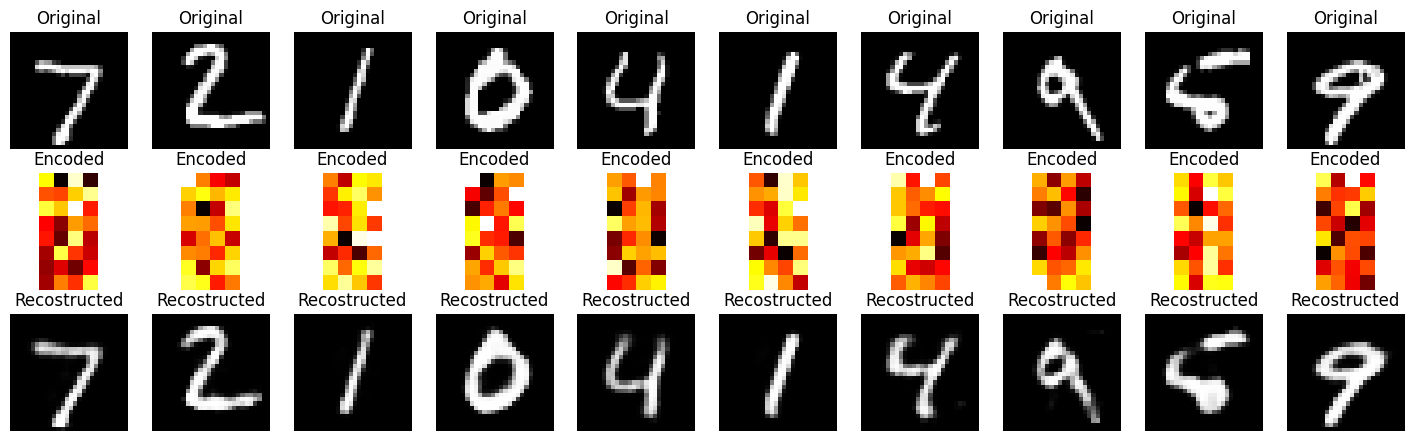

In [ ]:
# Test and visualize test images
test_autoencoder_plot_images(model=model_V0, test_dataloader=test_dataloader, num_images=10, input_size=input_size, latent_size=latent_size_1)

#### Autoencoder V1

In [ ]:
# For reproducability
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Define the new autoencoder
latent_size_2 = 3
model_V1 = Autoencoder_V1(input_size, latent_size_2).to(device) # Transfer model to device

# Define loss function and optimizer
loss = nn.MSELoss() # MSE is the standard reconstruction-oriented loss
optimizer = torch.optim.Adam(model_V1.parameters(), lr=learning_rate)

In [ ]:
# Train
train_autoencoder(model=model_V1, loss_fn=loss, optimizer=optimizer, train_dataloader=train_dataloader, num_epochs=num_epochs)

Epoch [1/20], Loss: 0.0488
Epoch [2/20], Loss: 0.0367
Epoch [3/20], Loss: 0.0460
Epoch [4/20], Loss: 0.0337
Epoch [5/20], Loss: 0.0369
Epoch [6/20], Loss: 0.0396
Epoch [7/20], Loss: 0.0314
Epoch [8/20], Loss: 0.0318
Epoch [9/20], Loss: 0.0349
Epoch [10/20], Loss: 0.0297
Epoch [11/20], Loss: 0.0308
Epoch [12/20], Loss: 0.0362
Epoch [13/20], Loss: 0.0337
Epoch [14/20], Loss: 0.0406
Epoch [15/20], Loss: 0.0346
Epoch [16/20], Loss: 0.0315
Epoch [17/20], Loss: 0.0299
Epoch [18/20], Loss: 0.0323
Epoch [19/20], Loss: 0.0363
Epoch [20/20], Loss: 0.0333


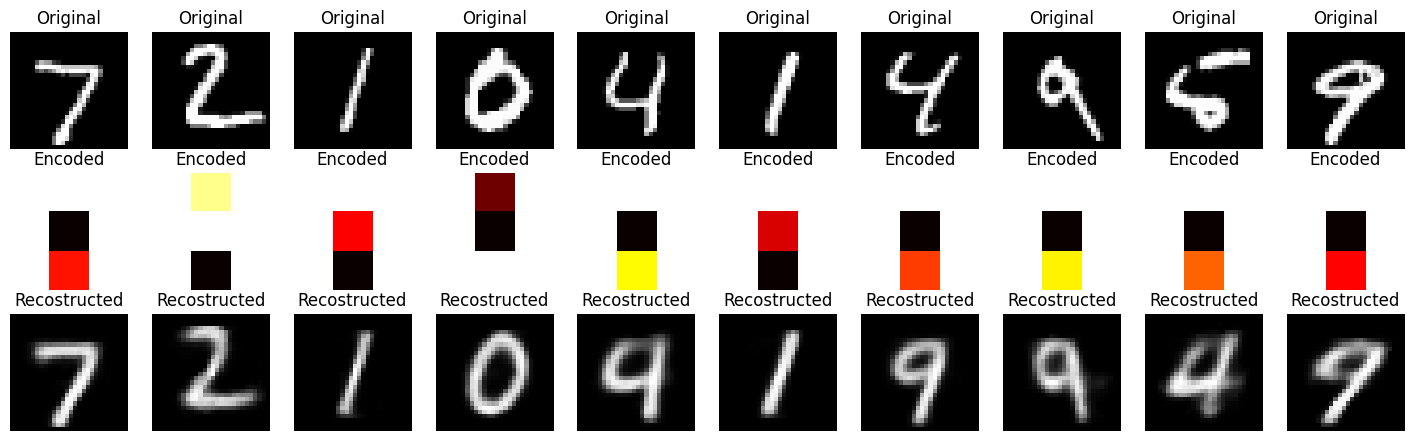

In [ ]:
# Test and visualize test images
test_autoencoder_plot_images(model=model_V1, test_dataloader=test_dataloader, num_images=10, input_size=input_size, latent_size=latent_size_2)

## 2.B

In [ ]:
# Function that returns two lists with the labels and the encodings of the images of a dataloader
def find_latent_lists(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader):
  model.eval()
  all_labels = []
  all_encoded_imgs = []

  with torch.inference_mode():
    for data in dataloader:
      img, labels = data
      img = img.view(img.size(0), -1).to(device)

      encoded_imgs = model.encoder(img) # Get the encoding of the image (3 numbers)
      all_labels.append(labels.cpu().numpy())
      all_encoded_imgs.append(encoded_imgs.cpu().numpy())

  all_labels = np.concatenate(all_labels)
  all_encoded_imgs = np.concatenate(all_encoded_imgs)

  return all_labels, all_encoded_imgs

# Find the labels and encodings for train and test images
all_train_labels, all_train_encoded_imgs = find_latent_lists(model_V1, train_dataloader)
all_test_labels, all_test_encoded_imgs = find_latent_lists(model_V1, test_dataloader)

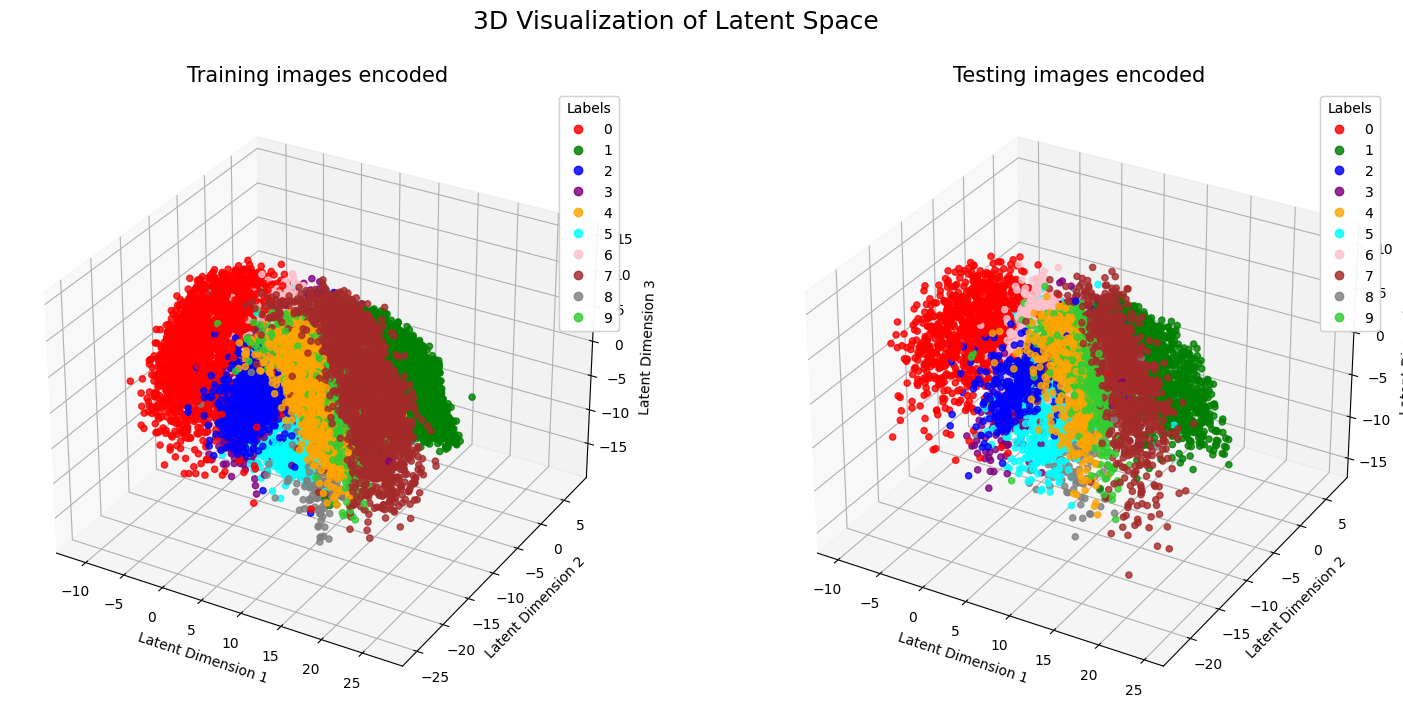

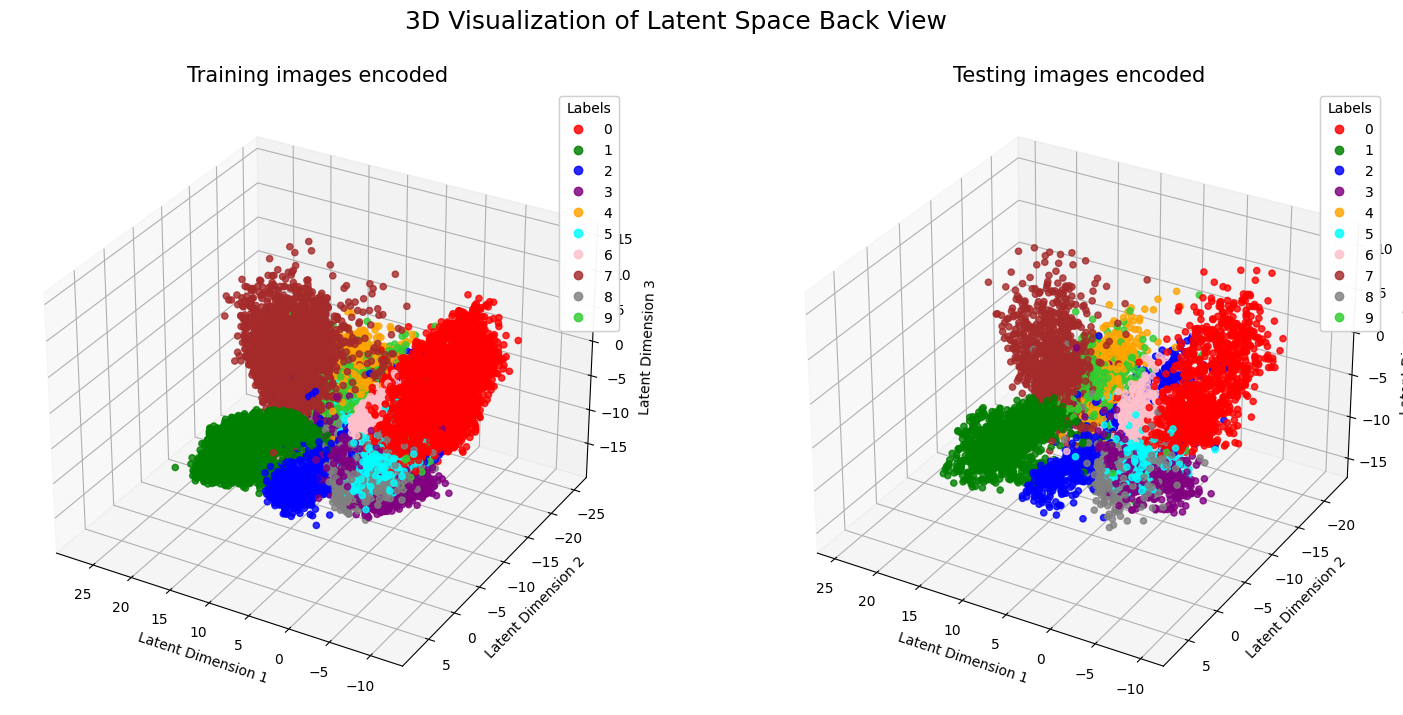

In [ ]:
# Function that plots the images as points in the 3D latent space
def plot_latent_space(all_train_labels: list, all_train_encoded_imgs: list, all_test_labels: list, all_test_encoded_imgs: list):

  # Define custom colormap, to be able to see the differencies of the colours
  my_colormap = ListedColormap(['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'pink', 'brown', 'gray', 'limegreen'])

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': '3d'})

  scatter_train = ax1.scatter(all_train_encoded_imgs[:, 0], all_train_encoded_imgs[:, 1], all_train_encoded_imgs[:, 2], c=all_train_labels, cmap=my_colormap, alpha=0.8)
  ax1.set_title('Training images encoded', fontsize=15)
  ax1.set_xlabel('Latent Dimension 1')
  ax1.set_ylabel('Latent Dimension 2')
  ax1.set_zlabel('Latent Dimension 3')
  legend_train = ax1.legend(*scatter_train.legend_elements(), title="Labels")
  ax1.add_artist(legend_train)

  scatter_test = ax2.scatter(all_test_encoded_imgs[:, 0], all_test_encoded_imgs[:, 1], all_test_encoded_imgs[:, 2], c=all_test_labels, cmap=my_colormap, alpha=0.8)
  ax2.set_title('Testing images encoded', fontsize=15)
  ax2.set_xlabel('Latent Dimension 1')
  ax2.set_ylabel('Latent Dimension 2')
  ax2.set_zlabel('Latent Dimension 3')
  legend_test = ax2.legend(*scatter_test.legend_elements(), title="Labels")
  ax2.add_artist(legend_test)

  plt.suptitle('3D Visualization of Latent Space', fontsize=18)
  plt.show()

  # Set a different viewpoint
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': '3d'})

  scatter_train = ax1.scatter(all_train_encoded_imgs[:, 0], all_train_encoded_imgs[:, 1], all_train_encoded_imgs[:, 2], c=all_train_labels, cmap=my_colormap, alpha=0.8)
  ax1.set_title('Training images encoded', fontsize=15)
  ax1.set_xlabel('Latent Dimension 1')
  ax1.set_ylabel('Latent Dimension 2')
  ax1.set_zlabel('Latent Dimension 3')
  legend_train = ax1.legend(*scatter_train.legend_elements(), title="Labels")
  ax1.add_artist(legend_train)

  scatter_test = ax2.scatter(all_test_encoded_imgs[:, 0], all_test_encoded_imgs[:, 1], all_test_encoded_imgs[:, 2], c=all_test_labels, cmap=my_colormap, alpha=0.8)
  ax2.set_title('Testing images encoded', fontsize=15)
  ax2.set_xlabel('Latent Dimension 1')
  ax2.set_ylabel('Latent Dimension 2')
  ax2.set_zlabel('Latent Dimension 3')
  legend_test = ax2.legend(*scatter_test.legend_elements(), title="Labels")
  ax2.add_artist(legend_test)

  # Regulate view angle
  ax1.view_init(elev=30, azim=120)
  ax2.view_init(elev=30, azim=120)

  plt.suptitle('3D Visualization of Latent Space Back View', fontsize=18)
  plt.show()

plot_latent_space(all_train_labels, all_train_encoded_imgs, all_test_labels, all_test_encoded_imgs)

## 2.Γ

In [ ]:
# Function for testing the autoencoder and visualizing the images
def test_autoencoder_plot_images(model: torch.nn.Module, input_size: int, latent_size: int, latent_space_points: np.ndarray):

  model.eval() # Set evaluation mode

  with torch.inference_mode(): # Deactivate gradient tracking
    latent_space_points_tensor = torch.tensor(latent_space_points, dtype=torch.float32).to(device)
    generated_images = model.decoder(latent_space_points_tensor).cpu().numpy() # Generated image, 28 x 28

    # Visualize the original, encoded and reconstructed images
    plt.figure(figsize=(12, 3))

    # Latent representation
    plt.subplot(1, 3, 2)
    plt.imshow(latent_space_points.reshape(-1, 1), cmap='hot')  # Displaying latent vector as colors
    plt.title('Latent Space Input')
    plt.axis('off')

    # Generated images
    plt.subplot(1, 3, 3)
    plt.imshow(generated_images.reshape(input_size, input_size), cmap='gray')
    plt.title('Generated')
    plt.axis('off')

    plt.show()

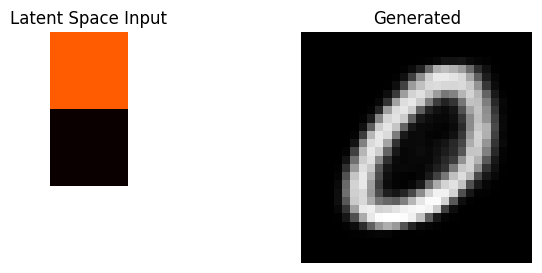

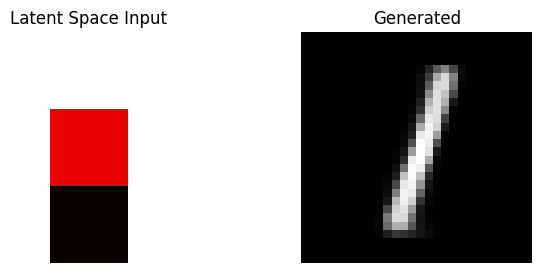

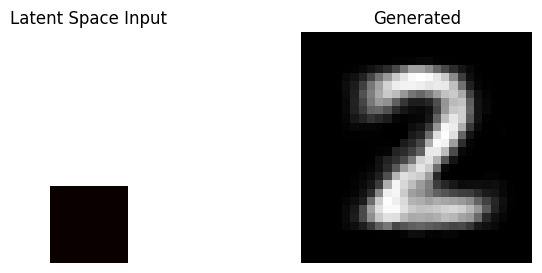

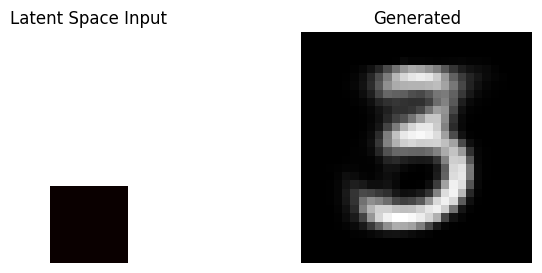

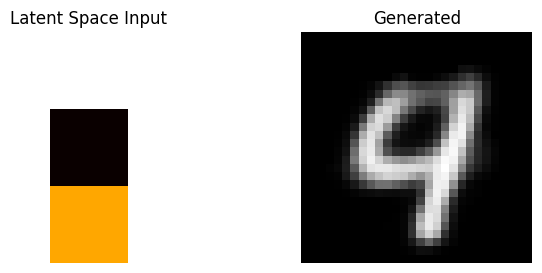

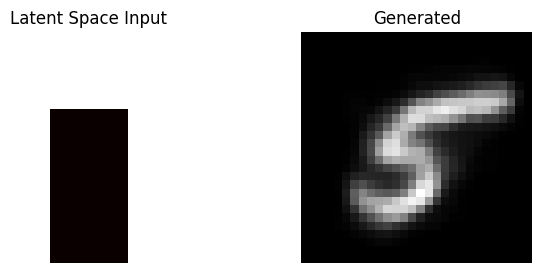

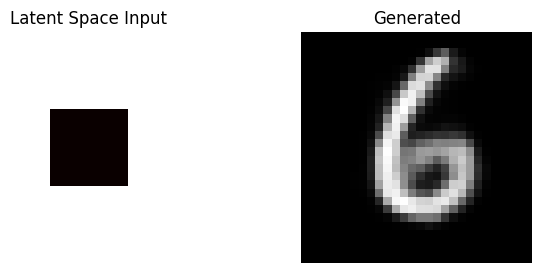

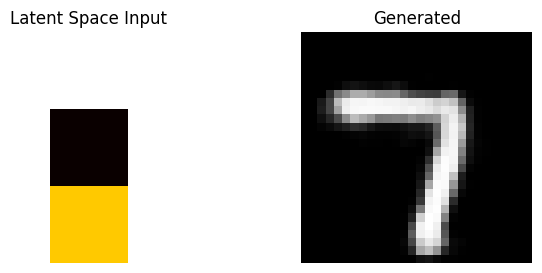

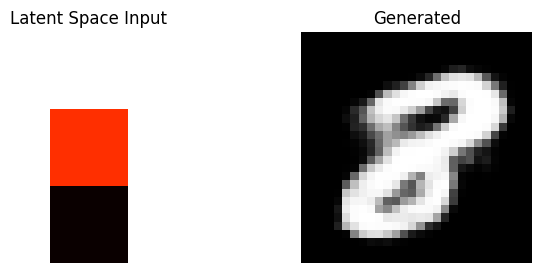

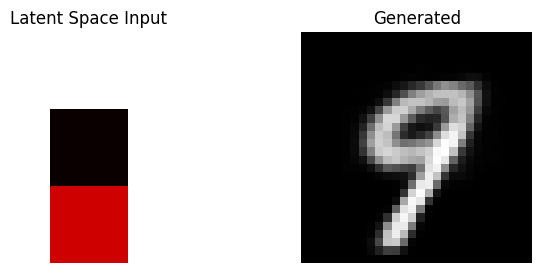

In [ ]:
# Choose different points to see what image is generated
# These points generate digits

latent_space_points = np.array([-5, -10, 0]) # 0
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([10, 0, -5]) # 1
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([2, 2, -5]) # 2
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([-3, -3, -5]) # 3
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([5, -8, 0]) # 4
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([4, -9, -9]) # 5
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([-2, -3, -2]) # 6
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([10, -5, 5]) # 7
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([3, -10, -20]) # 8
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([9, -8, -3]) # 9
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

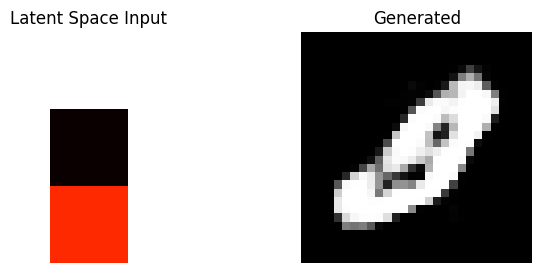

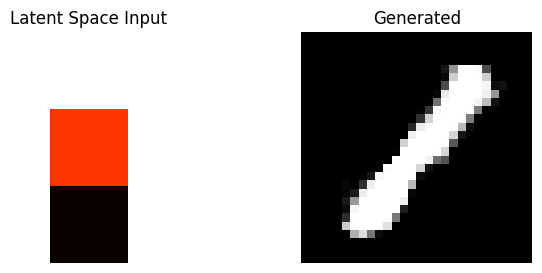

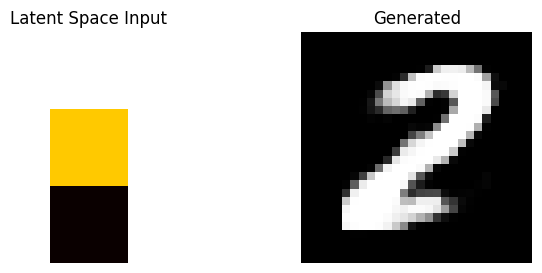

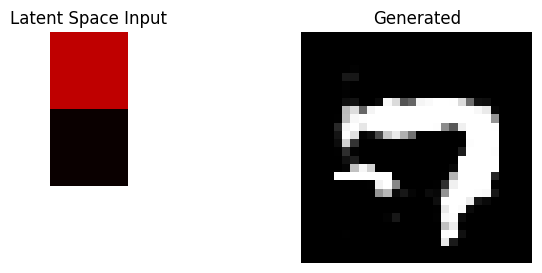

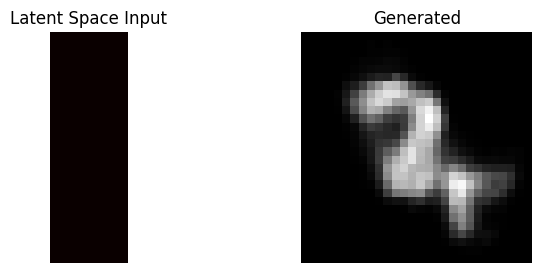

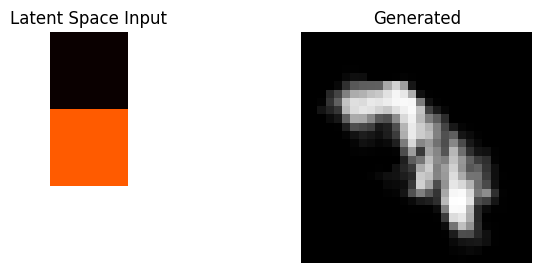

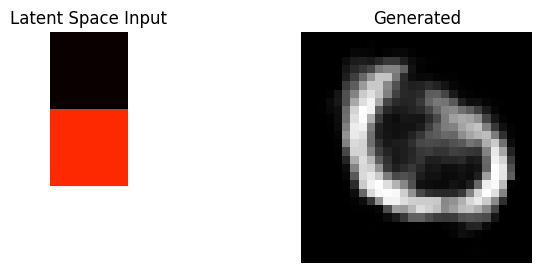

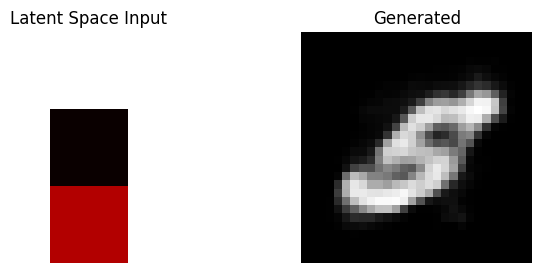

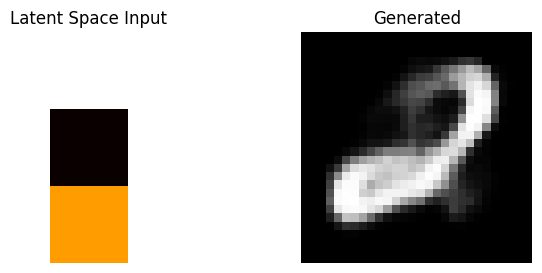

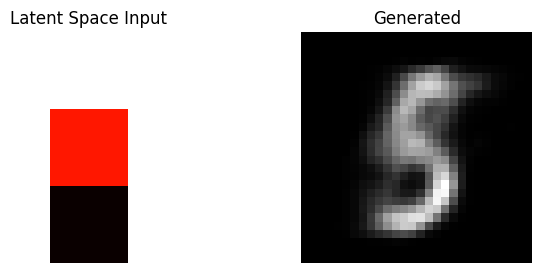

In [ ]:
# Choose different points to see what image is generated
# Some points generate digits but some others don't generate clear digits

latent_space_points = np.array([0, -35, -20])
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([25, 0, -20])
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([10, 0, -20])
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([-5, -20, 35])
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([0, 0, 0])
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([1, 2, 3])
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([-3, 0, 4])
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([5, -15, -10])
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([5, -20, -5])
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

latent_space_points = np.array([0, -3, -5])
test_autoencoder_plot_images(model_V1, input_size, latent_size_2, latent_space_points)

# Άσκηση 3

Πρέπει να κάνουμε upload το αρχείο breast+cancer+wisconsin+diagnostic.zip στο colab.

In [ ]:
!ls

breast+cancer+wisconsin+diagnostic.zip	Cifar10  iris  iris.zip  Mnist	sample_data


In [ ]:
if not os.path.exists('breast+cancer+wisconsin+diagnostic'): # If it is not already unzipped
  !unzip breast+cancer+wisconsin+diagnostic.zip

Archive:  breast+cancer+wisconsin+diagnostic.zip
   creating: breast+cancer+wisconsin+diagnostic/
  inflating: breast+cancer+wisconsin+diagnostic/wdbc.data  
  inflating: breast+cancer+wisconsin+diagnostic/wdbc.names  


In [ ]:
column_names = [
    'ID',
    'Diagnosis',
    'Mean_Radius',
    'Mean_Texture',
    'Mean_Perimeter',
    'Mean_Area',
    'Mean_Smoothness',
    'Mean_Compactness',
    'Mean_Concavity',
    'Mean_Concave_Points',
    'Mean_Symmetry',
    'Mean_Fractal_Dimension',
    'Radius_SE',
    'Texture_SE',
    'Perimeter_SE',
    'Area_SE',
    'Smoothness_SE',
    'Compactness_SE',
    'Concavity_SE',
    'Concave_Points_SE',
    'Symmetry_SE',
    'Fractal_Dimension_SE',
    'Worst_Radius',
    'Worst_Texture',
    'Worst_Perimeter',
    'Worst_Area',
    'Worst_Smoothness',
    'Worst_Compactness',
    'Worst_Concavity',
    'Worst_Concave_Points',
    'Worst_Symmetry',
    'Worst_Fractal_Dimension'
] # Taken from wdbc.names

# Read the data into a dataframe, file is separated with ,
breast_cancer_df = pd.read_csv("breast+cancer+wisconsin+diagnostic/wdbc.data", sep=",", header=None, names=column_names)

In [ ]:
breast_cancer_df.head()

,ID,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breast_cancer_df.tail()

,ID,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
# Count samples of each class
unique_classes, counts = np.unique(breast_cancer_df["Diagnosis"], return_counts=True)

# Display the results
for cl, count in zip(unique_classes, counts):
  print(f'Class {cl}: {count} samples')

Class B: 357 samples
Class M: 212 samples


In [ ]:
num_samples = breast_cancer_df.shape[0]
num_features = breast_cancer_df.shape[1]-2
num_classes = len(unique_classes)
print("Number of samples is", num_samples, "and number of features is", num_features, "and number of classes is", num_classes)

Number of samples is 569 and number of features is 30 and number of classes is 2


In [ ]:
# Create a mapping dictionary in order to convert class names to numerical values
class_mapping = {'B': 0, 'M': 1}

# Apply the mapping to the 'class' column, add a new column that is numerical encoded
breast_cancer_df['class_encoded'] = breast_cancer_df['Diagnosis'].map(class_mapping)

In [ ]:
breast_cancer_df

,ID,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,...,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension,class_encoded
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
breast_cancer_df = breast_cancer_df.drop("ID", axis=1) # Drop ID column from features, it is not valuable for our task
breast_cancer_df = breast_cancer_df.drop("Diagnosis", axis=1) # Drop Diagnosis coluumn

In [ ]:
# Extract features and convert it to a NumPy array
x_data = breast_cancer_df.iloc[:, :num_features].values
# Extract the last column (labels) and convert it to a NumPy array
y_data = breast_cancer_df.iloc[:, -1].values # labels must have numerical values

In [ ]:
# Print shapes
print(x_data.shape)
print(y_data.shape)

(569, 30)
(569,)


## 3.Α

In [ ]:
# Split 70% Training - 30% Testing
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=RANDOM_SEED)

# Print the sizes
print("Size of X_train:", len(X_train))
print("Size of X_test:", len(X_test))
print("Size of y_train:", len(y_train))
print("Size of y_test:", len(y_test))

Size of X_train: 398
Size of X_test: 171
Size of y_train: 398
Size of y_test: 171


## 3.Β

In [ ]:
# Function to simulate missing values
def introduce_missing_values(X: np.ndarray, percentage: float):
    missing_mask = np.random.rand(*X.shape) < percentage
    X_missing = X.copy()
    X_missing[missing_mask] = np.nan
    return X_missing

np.random.seed(RANDOM_SEED)
missing_persentage = 0.10 # 10% missing values
X_train_missing = introduce_missing_values(X_train, missing_persentage) # Introduce missing values to the training set

print("Missing values are 10% of the training data.")
print("Missing values for each feature are")
print(np.sum(np.isnan(X_train_missing), axis=0))

Missing values are 10% of the training data.
Missing values for each feature are
[44 36 35 50 37 50 40 34 43 45 30 45 39 50 40 37 38 47 44 36 45 32 49 43
 47 41 43 32 33 38]


In [ ]:
# Count NaN values
nan_counts = np.sum(np.isnan(X_train_missing))

print("Total number of values in training set is:", num_features*X_train.shape[0])
print("Total number of missing values is:", nan_counts)
print(f"Percentage of missing values in training set is: {round(nan_counts*100 / (num_features*X_train.shape[0]), 2)}%")

Total number of values in training set is: 11940
Total number of missing values is: 1223
Percentage of missing values in training set is: 10.24%


In [ ]:
# Visualize X_train_missing as a dataframe, observe the missing values
breast_cancer_df_missing = pd.DataFrame(X_train_missing, columns=column_names[2:])
breast_cancer_df_missing

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
0,17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,...,21.57,28.87,143.60,1437.0,0.1207,0.47850,0.5165,0.19960,0.2301,0.12240
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,...,16.76,17.24,108.50,862.0,0.1223,0.19280,0.2492,0.09186,NaN,0.07048
2,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,...,10.17,22.80,64.01,317.0,0.1460,0.13100,0.0000,0.00000,0.2445,NaN
3,NaN,15.18,93.97,NaN,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,...,15.85,19.85,108.60,766.9,0.1316,0.27350,0.3103,0.15990,0.2691,0.07683
4,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,NaN,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.26290,0.2403,0.07370,NaN,0.09359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,11.750,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.03738,0.1993,NaN,...,13.32,26.21,88.91,543.9,0.1358,0.18920,0.1956,0.07909,0.3168,0.07987
394,18.050,16.15,120.20,1006.0,0.10650,NaN,0.16840,0.10800,0.2152,0.06673,...,22.39,18.91,150.10,1610.0,0.1478,0.56340,0.3786,0.21020,0.3751,0.11080
395,12.180,20.52,77.22,NaN,0.08013,0.04038,0.02383,0.01770,0.1739,0.05677,...,13.34,32.84,84.58,547.8,0.1123,0.08862,0.1145,0.07431,0.2694,0.06878
396,20.180,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.12590,0.1724,NaN,...,NaN,25.07,146.00,1479.0,0.1665,0.29420,0.5308,NaN,0.3032,0.08075


In [ ]:
# Decision tree classifier with max depth 5, without missing values
tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)

# Train
tree_classifier.fit(X_train, y_train)

# Make predictions
y_pred = tree_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Train with 0% missing values. Accuracy of the tree classifier is {accuracy*100:.2f}%")

Train with 0% missing values. Accuracy of the tree classifier is 93.57%


In [ ]:
# Decision tree classifier with max depth 5, with missing values
tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)

# Train
tree_classifier.fit(X_train_missing, y_train)

# Make predictions
y_pred = tree_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Train with {missing_persentage*100}% missing values. Accuracy of the tree classifier is {accuracy*100:.2f}%")

Train with 10.0% missing values. Accuracy of the tree classifier is 94.74%


## 3.Γ

In [ ]:
# Random Forest classifier with max depth 3, 100 trees, without missing values
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=5, bootstrap=False, random_state=RANDOM_SEED)

# Train the Random Forest on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the Random Forest
accuracy = accuracy_score(y_test, y_pred)
print(f"Train with 0% missing values. Accuracy of the random forest classifier is {accuracy*100:.2f}%")

Train with 0% missing values. Accuracy of the random forest classifier is 97.08%


In [ ]:
# Random Forest classifier with max depth 3, 100 trees, with missing values -> not supported from sklearn
num_trees = 100
predictions = []

for i in range(num_trees):
  # Tree classifier
  tree_classifier = DecisionTreeClassifier(max_depth=3, max_features=5, random_state=RANDOM_SEED+i)

  # Train
  tree_classifier.fit(X_train_missing, y_train)

  # Make predictions
  y_pred = tree_classifier.predict(X_test)
  predictions.append(y_pred)

  # Evaluate
  # accuracy = accuracy_score(y_test, y_pred)
  # print(f"Train with {missing_persentage*100}% missing values. Accuracy of the tree classifier {i} is {accuracy*100:.2f}%")

# Combine predictions using majority voting
ensemble_predictions = np.mean(predictions, axis=0) > 0.5 # Ensemble the predictions, if mean preds > 0.5, most trees have predicted 1 (majority voting for binary classification)

# Evaluate the forest
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Train with {missing_persentage*100}% missing values. Accuracy of the random forest classifier is {accuracy*100:.2f}%")

Train with 10.0% missing values. Accuracy of the random forest classifier is 97.08%


## 3.Δ

In [ ]:
# Decision tree classifier with max depth 5, with missing values
tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)

# Train
tree_classifier.fit(X_train_missing, y_train)

# Make predictions
y_pred = tree_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Train with {missing_persentage*100}% missing values. Accuracy of the tree classifier is {accuracy*100:.2f}%")

Train with 10.0% missing values. Accuracy of the tree classifier is 94.74%


In [ ]:
# Calculate feature importance for the tree
feature_importance = tree_classifier.feature_importances_

print(f"Features                    Importance")
for i, importance in enumerate(feature_importance):
  print(f"{i+1:2d} - {column_names[i+2]:25s} {importance:.4f}")

Features                    Importance
 1 - Mean_Radius               0.0000
 2 - Mean_Texture              0.0452
 3 - Mean_Perimeter            0.0000
 4 - Mean_Area                 0.0000
 5 - Mean_Smoothness           0.0000
 6 - Mean_Compactness          0.0018
 7 - Mean_Concavity            0.0027
 8 - Mean_Concave_Points       0.0139
 9 - Mean_Symmetry             0.0225
10 - Mean_Fractal_Dimension    0.0000
11 - Radius_SE                 0.0000
12 - Texture_SE                0.0000
13 - Perimeter_SE              0.0000
14 - Area_SE                   0.0000
15 - Smoothness_SE             0.0000
16 - Compactness_SE            0.0000
17 - Concavity_SE              0.0092
18 - Concave_Points_SE         0.0000
19 - Symmetry_SE               0.0000
20 - Fractal_Dimension_SE      0.0000
21 - Worst_Radius              0.0303
22 - Worst_Texture             0.0000
23 - Worst_Perimeter           0.0000
24 - Worst_Area                0.1975
25 - Worst_Smoothness          0.0000
26 - Worst_

In [ ]:
np.sum(feature_importance) # Sum of importance of all features is 1

1.0

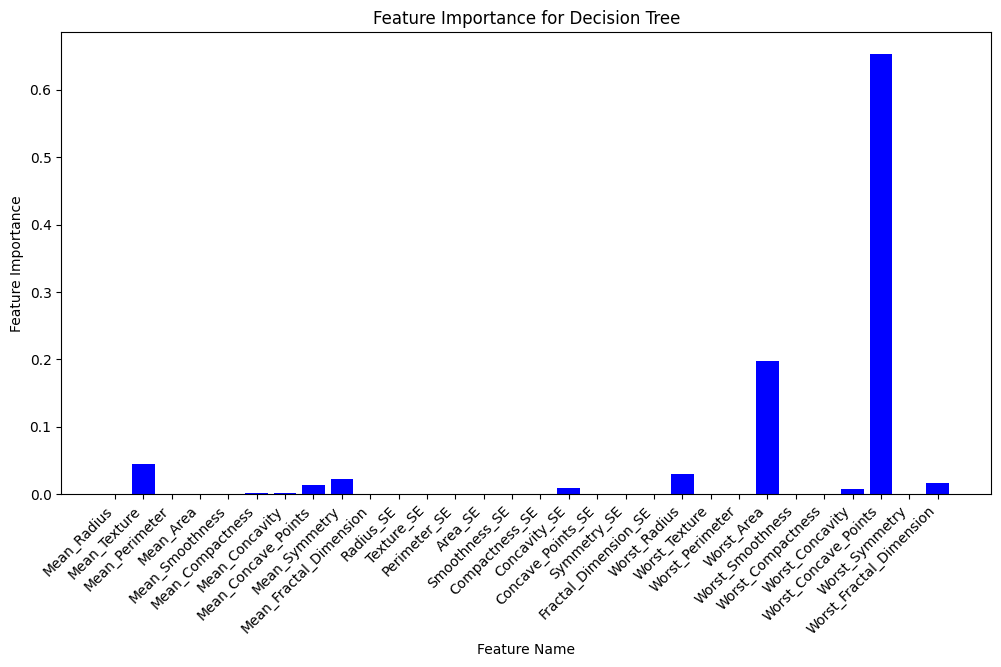

In [ ]:
# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance, color='blue')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Decision Tree')
plt.xticks(range(len(feature_importance)), [f"{name}" for i, name in enumerate(column_names[2:])], rotation=45, ha='right', fontsize=10)
plt.show()

In [ ]:
# Random Forest classifier with max depth 3, 100 trees, with missing values -> not supported from sklearn
num_trees = 100
predictions = []
feature_importances = []

for i in range(num_trees):
  # Tree classifier
  tree_classifier = DecisionTreeClassifier(max_depth=3, max_features=5, random_state=RANDOM_SEED+i)

  # Train
  tree_classifier.fit(X_train_missing, y_train)

  # Make predictions
  y_pred = tree_classifier.predict(X_test)
  predictions.append(y_pred)

  # Feature importance
  feature_importance = tree_classifier.feature_importances_
  feature_importances.append(feature_importance)

  # Evaluate
  # accuracy = accuracy_score(y_test, y_pred)
  # print(f"Train with {missing_persentage*100}% missing values. Accuracy of the tree classifier {i} is {accuracy*100:.2f}%")

# Combine predictions using majority voting
ensemble_predictions = np.mean(predictions, axis=0) > 0.5 # Ensemble the predictions, if mean preds > 0.5, most trees have predicted 1 (majority voting for binary classification)

# Evaluate the forest
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Train with {missing_persentage*100}% missing values. Accuracy of the random forest classifier is {accuracy*100:.2f}%")

Train with 10.0% missing values. Accuracy of the random forest classifier is 97.08%


In [ ]:
# Calculate feature importance for the random forest
feature_importance = np.nanmean(feature_importances, axis=0) # if there is nan value ignore it

print(f"Features                    Importance")
for i, importance in enumerate(feature_importance):
  print(f"{i+1:2d} - {column_names[i+2]:25s} {importance:.4f}")

Features                    Importance
 1 - Mean_Radius               0.0539
 2 - Mean_Texture              0.0093
 3 - Mean_Perimeter            0.0625
 4 - Mean_Area                 0.0656
 5 - Mean_Smoothness           0.0029
 6 - Mean_Compactness          0.0113
 7 - Mean_Concavity            0.0340
 8 - Mean_Concave_Points       0.1407
 9 - Mean_Symmetry             0.0007
10 - Mean_Fractal_Dimension    0.0009
11 - Radius_SE                 0.0037
12 - Texture_SE                0.0040
13 - Perimeter_SE              0.0073
14 - Area_SE                   0.0526
15 - Smoothness_SE             0.0000
16 - Compactness_SE            0.0008
17 - Concavity_SE              0.0022
18 - Concave_Points_SE         0.0035
19 - Symmetry_SE               0.0014
20 - Fractal_Dimension_SE      0.0006
21 - Worst_Radius              0.0931
22 - Worst_Texture             0.0075
23 - Worst_Perimeter           0.1287
24 - Worst_Area                0.1069
25 - Worst_Smoothness          0.0035
26 - Worst_

In [ ]:
np.sum(feature_importance) # I want to sum to 1

0.991782130774515

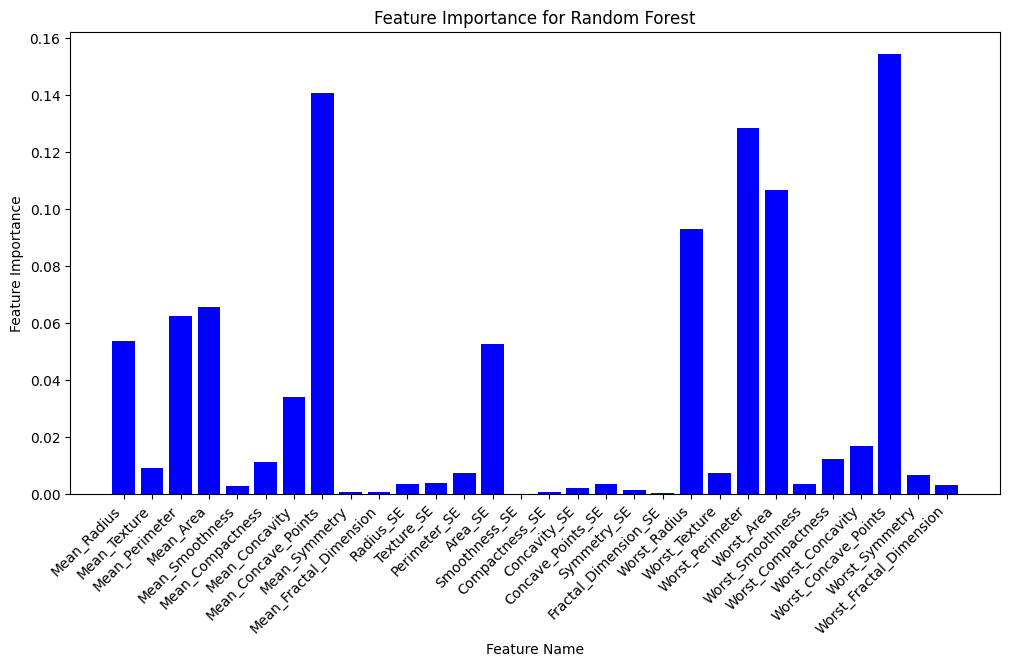

In [ ]:
# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance, color='blue')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Random Forest')
plt.xticks(range(len(feature_importance)), [f"{name}" for i, name in enumerate(column_names[2:])], rotation=45, ha='right', fontsize=10)
plt.show()

## 3.Ε

In [ ]:
# Function that makes an ensimble of trees, ranom forest classifier and printa accuracy
def random_forest(num_trees: int, max_depth: int, max_features: int, random_state: int, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray,):
  predictions = []
  probabilities = []

  for i in range(num_trees):
    # Tree classifier
    tree_classifier = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, random_state=random_state+i)

    # Train
    tree_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = tree_classifier.predict(X_test)
    predictions.append(y_pred)

    # Probabilities
    probs = tree_classifier.predict_proba(X_test)
    probabilities.append(probs)

    # Evaluate
    # accuracy = accuracy_score(y_test, y_pred)
    # print(f"Train with {missing_persentage*100}% missing values. Accuracy of the tree classifier {i} is {accuracy*100:.2f}%")

  # Combine predictions using majority voting
  ensemble_predictions = np.mean(predictions, axis=0) > 0.5 # Ensemble the predictions, if mean preds > 0.5, most trees have predicted 1 (majority voting for binary classification)
  ensemble_probs = np.mean(probabilities, axis=0) # Probability of the forest

  return ensemble_predictions, ensemble_probs

In [ ]:
np.random.seed(RANDOM_SEED)

missing_percentage_train = [round(x*0.1, 1) for x in range(0, 9, 1)] # [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
missing_percentage_test = [round(x*0.1, 1) for x in range(0, 9, 1)]

acc = []

for per_train in missing_percentage_train:
  X_train_missing = introduce_missing_values(X_train, per_train) # Introduce missing values to the training set
  for per_test in missing_percentage_test:
    X_test_missing = introduce_missing_values(X_test, per_test) # Introduce missing values to the test set

    ensemble_preds, _ = random_forest(num_trees=100, max_depth=3, max_features=5, random_state=RANDOM_SEED, X_train=X_train_missing, y_train=y_train, X_test=X_test_missing, y_test=y_test)
    accuracy = accuracy_score(y_test, ensemble_preds)
    # print(f"Train with {per_train*100}% missing values. Test with {per_test*100}% missing values.")
    # print(f"Accuracy of the random forest classifier is {accuracy*100:.2f}%\n")

    acc.append(accuracy)

In [ ]:
# Reshape acc list into a 2D array, every line referes to a training missing percentage, each column referes to a testing missing percentage
acc_array = np.array(acc).reshape(len(missing_percentage_train), len(missing_percentage_test))
# acc_array

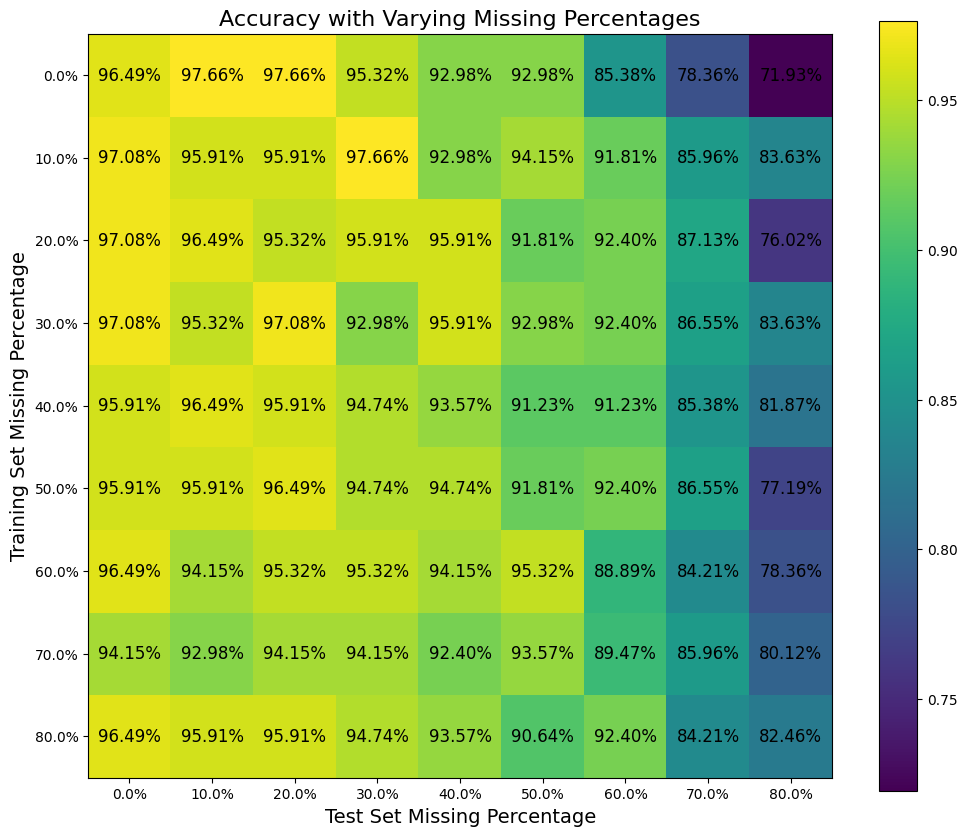

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(acc_array, cmap='viridis')

# Set axis labels
ax.set_xticks(np.arange(len(missing_percentage_train)))
ax.set_yticks(np.arange(len(missing_percentage_test)))
ax.set_xticklabels([f'{p*100}%' for p in missing_percentage_test])
ax.set_yticklabels([f'{p*100}%' for p in missing_percentage_train])

# Set labels
ax.set_xlabel('Test Set Missing Percentage', fontsize=14)
ax.set_ylabel('Training Set Missing Percentage', fontsize=14)
ax.set_title('Accuracy with Varying Missing Percentages', fontsize=16)

# Display the accuracy values on the plot
for i in range(len(missing_percentage_train)):
  for j in range(len(missing_percentage_test)):
      text = ax.text(j, i, f'{acc_array[i, j]*100:.2f}%', ha='center', va='center', color='black', fontsize=12)

# Show the plot
plt.colorbar(im)
plt.show()

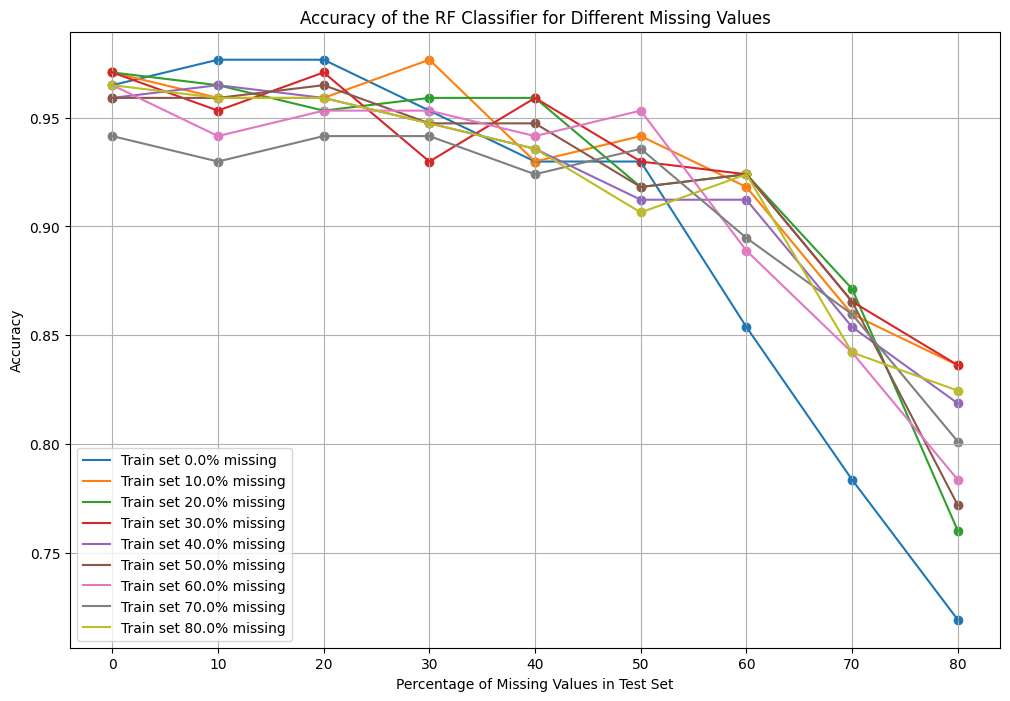

In [ ]:
plt.figure(figsize=(12, 8))

# Plot lines
for i in range(len(missing_percentage_train)):
  plt.plot(np.array(missing_percentage_test) * 100, acc_array[i], label=f'Train set {missing_percentage_train[i]*100}% missing')

# Plot points
for i in range(len(missing_percentage_train)):
  plt.scatter(np.array(missing_percentage_test) * 100, acc_array[i], marker='o')

plt.title('Accuracy of the RF Classifier for Different Missing Values')
plt.xlabel('Percentage of Missing Values in Test Set')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

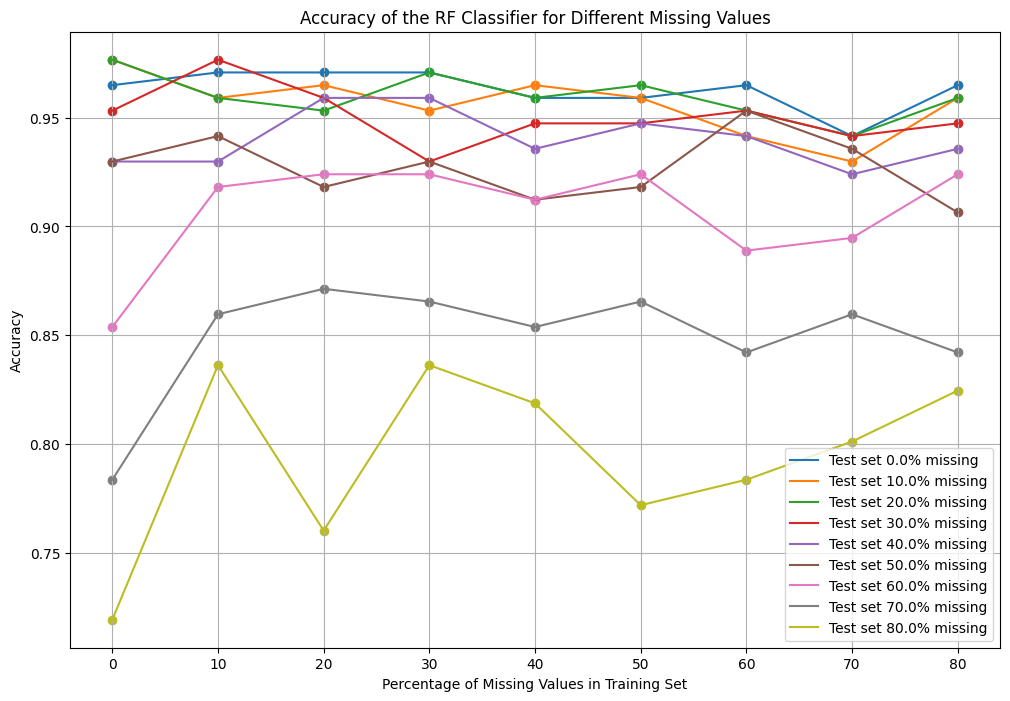

In [ ]:
plt.figure(figsize=(12, 8))

acc_array = acc_array.T # For plotting the columns of the initial array without changing the code for the plot

# Plot lines
for i in range(len(missing_percentage_test)):
  plt.plot(np.array(missing_percentage_test) * 100, acc_array[i], label=f'Test set {missing_percentage_train[i]*100}% missing')

# Plot points
for i in range(len(missing_percentage_test)):
  plt.scatter(np.array(missing_percentage_test) * 100, acc_array[i], marker='o')

plt.title('Accuracy of the RF Classifier for Different Missing Values')
plt.xlabel('Percentage of Missing Values in Training Set')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## 3.ΣΤ

In [ ]:
np.random.seed(RANDOM_SEED)
missing_persentage = 0.10 # 10% missing values
X_train_missing = introduce_missing_values(X_train, missing_persentage) # Introduce missing values to the training set

In [ ]:
# Decision tree classifier with max depth 5, with missing values
tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)

# Train
tree_classifier.fit(X_train_missing, y_train)

# Make predictions
y_pred = tree_classifier.predict(X_test)

# Probabilities
probs = tree_classifier.predict_proba(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Train with {missing_persentage*100}% missing values. Accuracy of the tree classifier is {accuracy*100:.2f}%")

Train with 10.0% missing values. Accuracy of the tree classifier is 94.74%


In [ ]:
# Random Forest classifier with max depth 3, 100 trees, with missing values
ensemble_preds, ensemble_probs = random_forest(num_trees=100, max_depth=3, max_features=5, random_state=RANDOM_SEED, X_train=X_train_missing, y_train=y_train, X_test=X_test, y_test=y_test)

# Evaluate the forest
accuracy = accuracy_score(y_test, ensemble_preds)
print(f"Train with {missing_persentage*100}% missing values. Accuracy of the random forest classifier is {accuracy*100:.2f}%")

Train with 10.0% missing values. Accuracy of the random forest classifier is 97.08%


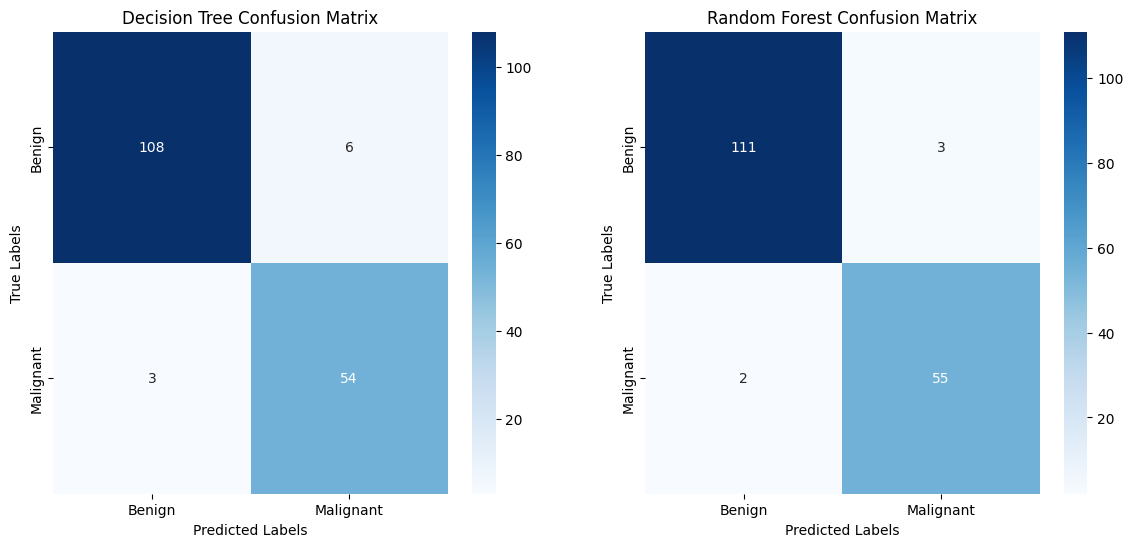

In [ ]:
# Plot confusion matrices for better evaluation
classes = ["Benign", "Malignant"] # -> Β=0, Μ=1

cm_dt = confusion_matrix(y_test, y_pred)
cm_rf = confusion_matrix(y_test, ensemble_preds)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

In [ ]:
# Function that plots the presicion recall curves for the different classes and thresholds
def plot_precision_recall_curves_binary(y_probs: np.ndarray, y_test: np.ndarray,):

  # Create subplots
  plt.figure(figsize=(7, 6))
  y_probs_class = y_probs[:, 1] # Probabilities of the class 1, positive class

  # Compute precision-recall pairs for the current class
  precision, recall, thresholds = precision_recall_curve(y_test, y_probs_class)

  # Calculate AUC for Precision-Recall curve
  auc_score = auc(recall, precision)
  plt.plot(recall, precision, label=f'AUC = {auc_score:.2f}', color='blue')

  # Set labels and title
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend()

  plt.show()

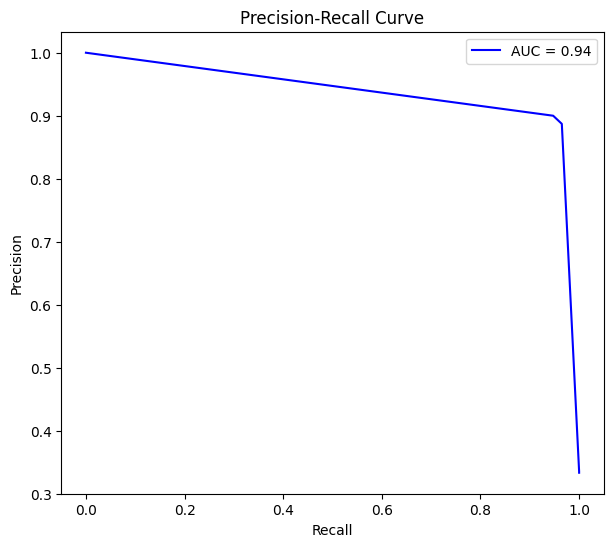

In [ ]:
# For Decision Tree precision-Recall curves
plot_precision_recall_curves_binary(probs, y_test)

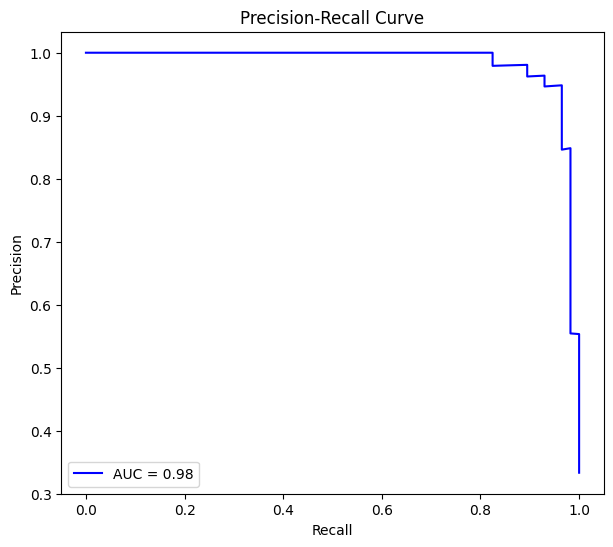

In [ ]:
# For Random Forest precision-Recall curves
plot_precision_recall_curves_binary(ensemble_probs, y_test)